In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

from scipy.ndimage import rotate
import os


import seaborn as sns
import sqlite3

set_linewidth = 1
all_color='grey'

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
db_folder = '../../data/db/'
# db_path = '2023_YTD_Game_Stats_Cleaned.db'
db_path = 'FinalBreak_YTD_Stats.db'

## Connect to the Database
conn = sqlite3.connect(db_folder + db_path)

matchup_tag = "GLI_12-18"

### DEFINE TEMP FOLDER - MAKE SURE IT IS NOT OVERWRITTEN BELOW
TEMP_FOLDER = '../../GLI_program/plot_working_folder/'

In [2]:
import matplotlib
print(matplotlib.get_cachedir())


C:\Users\Justin\.matplotlib


# Signature Tags with Source and Github

In [3]:
def add_source_sig_text():
    # Add text at the bottom left corner
    padding = 3  # Padding in points
    plt.annotate('DATASOURCE: College Hockey News | Dec 11, 2023', xy=(0, 0), xycoords='figure fraction',
                 xytext=(padding, padding), textcoords='offset points', ha='left', va='bottom', fontsize=14)

    # Create a new axes to the right outside of the main plot for the GitHub logo
    ax2 = plt.gcf().add_axes([1.005, 0.12, 0.04, 0.04], frame_on=False)  # Adjusted values for positioning & size

    # # Load and add the GitHub logo
    # github_img = mpimg.imread('../../images/logos/github.png')  # Replace with the path to your GitHub logo
    # # Rotate the GitHub logo
    # github_img = rotate(github_img, 90)  # Rotate by 90 degrees
    # ax2.imshow(github_img)
    ax2.axis('off')

    # Add GitHub username rotated next to the logo
    # plt.gcf().text(1.015, 0.3, 'GitHub - JSmith1826/college_hockey', fontsize=14, ha='right', va='center', rotation=90)


# Figure Size and Font Settings

In [4]:

## Make Sure Font Library is updated
import matplotlib.font_manager
# matplotlib.font_manager._rebuild()


# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (10, 8) # Original
fig_deafult_2 = (12, 10)
square_fig = (10, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
# figure_size = fig_deafult_2


figure_size = square_fig

#### INSTAGRAM SIZE - Portrait
dpi = 600
width, height = 1080, 1350  # in pixels
# figure_size = (width / dpi, height / dpi)  # in inches

## FONT PARAMETERS
font_title_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 16}
font_label_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 14}
font_tick_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 8}
font_label_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 16}
font_tick_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 12}

font_tag_parm = {'family': 'Exo 2', 'color': 'black', 'weight': 'bold', 'size': 10}
font_tag_parm_2 = {'family': 'Exo 2', 'color': 'black', 'weight': 'bold', 'size': 12}

In [5]:
### Teams and Colors

team_1 = 'Michigan State'
team_2 = 'Ferris State'
team_3 = 'Michigan Tech'
team_4 = 'Alaska'

team_1_abv = 'MSU'
team_2_abv = 'FSU'
team_3_abv = 'MTU'
team_4_abv = 'AKA'

# Logo Folder Path
logo_folder = '../../images/logos/'
team_1_logo_path = logo_folder + 'msu.png'
team_2_logo_path = logo_folder + 'fsu.png'
team_3_logo_path = logo_folder + 'mtu.png'
team_4_logo_path = logo_folder + 'akf.png'

# Team Colors (Dark, light, dark_muted)
team_1_colors = ['#18453B', '#FFFFFF', '#2a6256']
team_2_colors = ['#BA0C2F', '#FFD043', '#D23A5D']
team_3_colors = ['#000000', '#FFCD00', '#36454F']
team_4_colors = ['#236192', '#FFC000', '#569CD6']

# Primary Team Color dictionary
team_colors = {team_1: '#18453B',
                team_2: '#BA0C2F',
                team_3: '#000000',
                team_4: '#236192'}

# ### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = team_colors

#### Set Background Image
path_to_bg_image =  'generic_dark_background.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
# bg_img = mpimg.imread(background_folder + path_to_bg_image)
bg_img = None

# # Set the order of Teams - Keep this order consistent - Keep semi-matchups grouped
team_order = [team_1, team_2, team_3, team_4]


## Helper Functions & Logo Mapping

In [6]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.05, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    
    'Michigan State': 'msu.png',
    'Michigan Tech': 'mtu.png',
    'Ferris State': 'fsu.png',
    'Alaska': 'akf.png',
    
}

## 1 x 2 scatter plots for half page 
### set of 2 to arrange across each half

## Create combined Scatter Plot image (for half page)

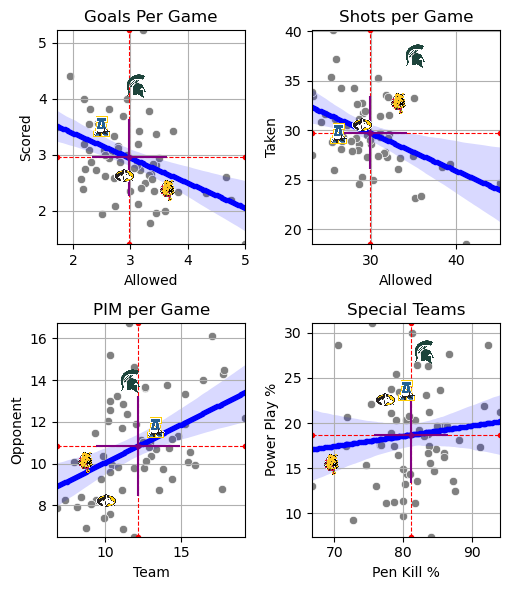

In [7]:
#### Set Figure Size
half_page = (5.2, 6) # Half Page


# AVG GOALS FOR AND AGAINST
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""
# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)
# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


####### AVERAGE SHOTS
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""
# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()
#########

############# PIM PER GAME #############
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()
#####################################################

##### PP % vs PK % #####



# Create the scatter plot with trend line, average, and standard deviation
fig, axs = plt.subplots(2, 2, figsize=half_page)  # Create a figure and a set of subplots, and get the Axes object.

### TOP LEFT - GOALS
# Set the axis limits
axs[0,0].set_xlim([avg_goals_df['Avg_Goals_Allowed'].min(), avg_goals_df['Avg_Goals_Allowed'].max()])
axs[0,0].set_ylim([avg_goals_df['Avg_Goals_Scored'].min(), avg_goals_df['Avg_Goals_Scored'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey', ax=axs[0, 0])
# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue', ax=axs[0, 0])
# Add average lines
axs[0,0].axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
axs[0,0].axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[0,0].errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# # Highlight specific teams with their logos
# for team, color in highlight_colors.items():
#     team_data = avg_goals_df[avg_goals_df['Team'] == team]
#     plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x', ax=axs[0, 0])

# plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99, ax=axs[0, 0])

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=axs[0,0])

# Add title and axis labels
axs[0,0].set_title('Goals Per Game')
axs[0,0].set_xlabel('Allowed')
axs[0,0].set_ylabel('Scored')


########################### SHOTS ###########################
### TOP RIGHT - SHOTS
# Set the axis limits
axs[0,1].set_xlim([avg_shots_df['Avg_Shots_Allowed'].min(), avg_shots_df['Avg_Shots_Allowed'].max()])
axs[0,1].set_ylim([avg_shots_df['Avg_Shots_Taken'].min(), avg_shots_df['Avg_Shots_Taken'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey', ax=axs[0, 1])
# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue', ax=axs[0, 1])
# Add average lines
axs[0,1].axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
axs[0,1].axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[0,1].errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=axs[0,1])

# Add title and axis labels
axs[0,1].set_title('Shots per Game')
axs[0,1].set_xlabel('Allowed')
axs[0,1].set_ylabel('Taken')
#############################################################

########################### PIM ###########################
### BOTTOM LEFT - PIM
# Set the axis limits
axs[1,0].set_xlim([avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max()])
axs[1,0].set_ylim([avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()])
# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=axs[1, 0])
# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue', ax=axs[1, 0])
# Add average lines
axs[1,0].axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
axs[1,0].axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[1,0].errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=axs[1,0])

# Add title and axis labels
axs[1,0].set_title('PIM per Game')
axs[1,0].set_xlabel('Team')
axs[1,0].set_ylabel('Opponent')
#############################################################

########################### PP % vs PK % ###########################
# Load the csv with the penalty data
penalty_data = pd.read_csv('../../GLI_program/powerplay_penkill_table.csv')
                           
            
# Create the scatter plot with trend line, average, and standard deviation
### BOTTOM RIGHT - PP % vs PK %
# Set the axis limits
axs[1,1].set_xlim([penalty_data['PK%'].min(), penalty_data['PK%'].max()])
axs[1,1].set_ylim([penalty_data['PP%'].min(), penalty_data['PP%'].max()])

# Scatter plot for all teams
sns.scatterplot(data=penalty_data, x='PK%', y='PP%', color='grey', ax=axs[1, 1])
# Add trend line
sns.regplot(data=penalty_data, x='PK%', y='PP%', scatter=False, color='blue', ax=axs[1, 1])

# Calculate and Add trend line
pk_percent = np.unique(penalty_data['PK%'])
pp_percent_trend = np.poly1d(np.polyfit(penalty_data['PK%'], penalty_data['PP%'], 1))(pk_percent)
axs[1,1].plot(pk_percent, pp_percent_trend, color='blue', linestyle='--', linewidth=0.8)

# Add average lines
axs[1,1].axhline(y=penalty_data['PP%'].mean(), color='red', linestyle='--', linewidth=0.8)
axs[1,1].axvline(x=penalty_data['PK%'].mean(), color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
axs[1,1].errorbar(penalty_data['PK%'].mean(), penalty_data['PP%'].mean(), xerr=penalty_data['PK%'].std(), yerr=penalty_data['PP%'].std(), color='purple', fmt='o')

# Add logos (if function available)
add_logos_to_plot(penalty_data, 'PK%', 'PP%', team_colors, logo_mapping, ax=axs[1,1])


# Add title and axis labels
axs[1,1].set_title('Special Teams')
axs[1,1].set_xlabel('Pen Kill %')
axs[1,1].set_ylabel('Power Play %')


#### Add grid to all plots
for ax in axs.flat:
    ax.grid(True)

# Change the background data marker type to a point "." 
for ax in axs.flat:
    for line in ax.get_lines():
        line.set_marker(".")
    


plt.tight_layout()



plt.savefig(f'{TEMP_FOLDER}team_comparison.png', bbox_inches='tight', dpi=600, transparent=True)
plt.show()


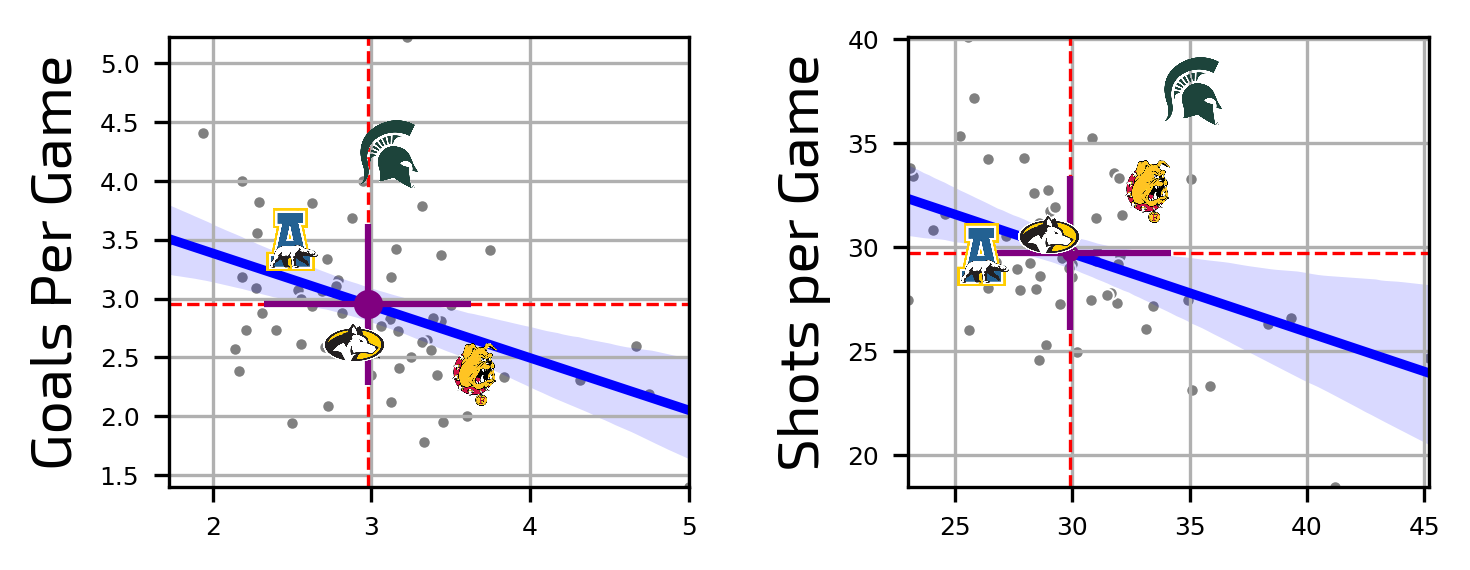

In [8]:
import matplotlib.font_manager as fm

## Figure size
# 2 x 1 figure on half page width 5 in , H 2 in
fig, axs = plt.subplots(1,2, figsize=(5, 2), dpi=300)

### FONT TEST WITH Exo 2
# set font parameters
font_title_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 14}
font_label_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 12}
font_tick_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 6}

font_label_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 16}
font_tick_large_param = {'family': 'Exo 2', 'color': 'black', 'weight': 'normal', 'size': 14}


### TOP LEFT - GOALS
# Set the axis limits
axs[0].set_xlim([avg_goals_df['Avg_Goals_Allowed'].min(), avg_goals_df['Avg_Goals_Allowed'].max()])
axs[0].set_ylim([avg_goals_df['Avg_Goals_Scored'].min(), avg_goals_df['Avg_Goals_Scored'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored',
                 color='grey', marker=".", ax=axs[0])
# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue', ax=axs[0])
# Add average lines
axs[0].axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
axs[0].axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[0].errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# # Highlight specific teams with their logos
# for team, color in highlight_colors.items():
#     team_data = avg_goals_df[avg_goals_df['Team'] == team]
#     plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x', ax=axs[0, 0])

# plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99, ax=axs[0, 0])

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=axs[0])

# Add title and axis labels
# axs[0].set_title('Goals Per Game')
axs[0].set_xlabel('')
axs[0].set_ylabel('Goals Per Game', fontdict=font_title_param)


########################### SHOTS ###########################
### TOP RIGHT - SHOTS
# Set the axis limits
axs[1].set_xlim([avg_shots_df['Avg_Shots_Allowed'].min(), avg_shots_df['Avg_Shots_Allowed'].max()])
axs[1].set_ylim([avg_shots_df['Avg_Shots_Taken'].min(), avg_shots_df['Avg_Shots_Taken'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken',
                 color='grey', marker=".",  ax=axs[1])
# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue', ax=axs[1])
# Add average lines
axs[1].axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
axs[1].axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[1].errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='.')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=axs[1])

# Add title and axis labels
# axs[1].set_title('Shots per Game')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_ylabel('Shots per Game', fontdict=font_title_param)

# Adjust tick marker font and size
axs[0].tick_params(axis='both', which='major', labelsize=6)
axs[1].tick_params(axis='both', which='major', labelsize=6)


# add grid to plots
for ax in axs.flat:
    ax.grid(True)

## Apply the font parameters




# Layout 
plt.tight_layout()
#############################################################

plt.show()

### Turn the above BLock into an easy to use function

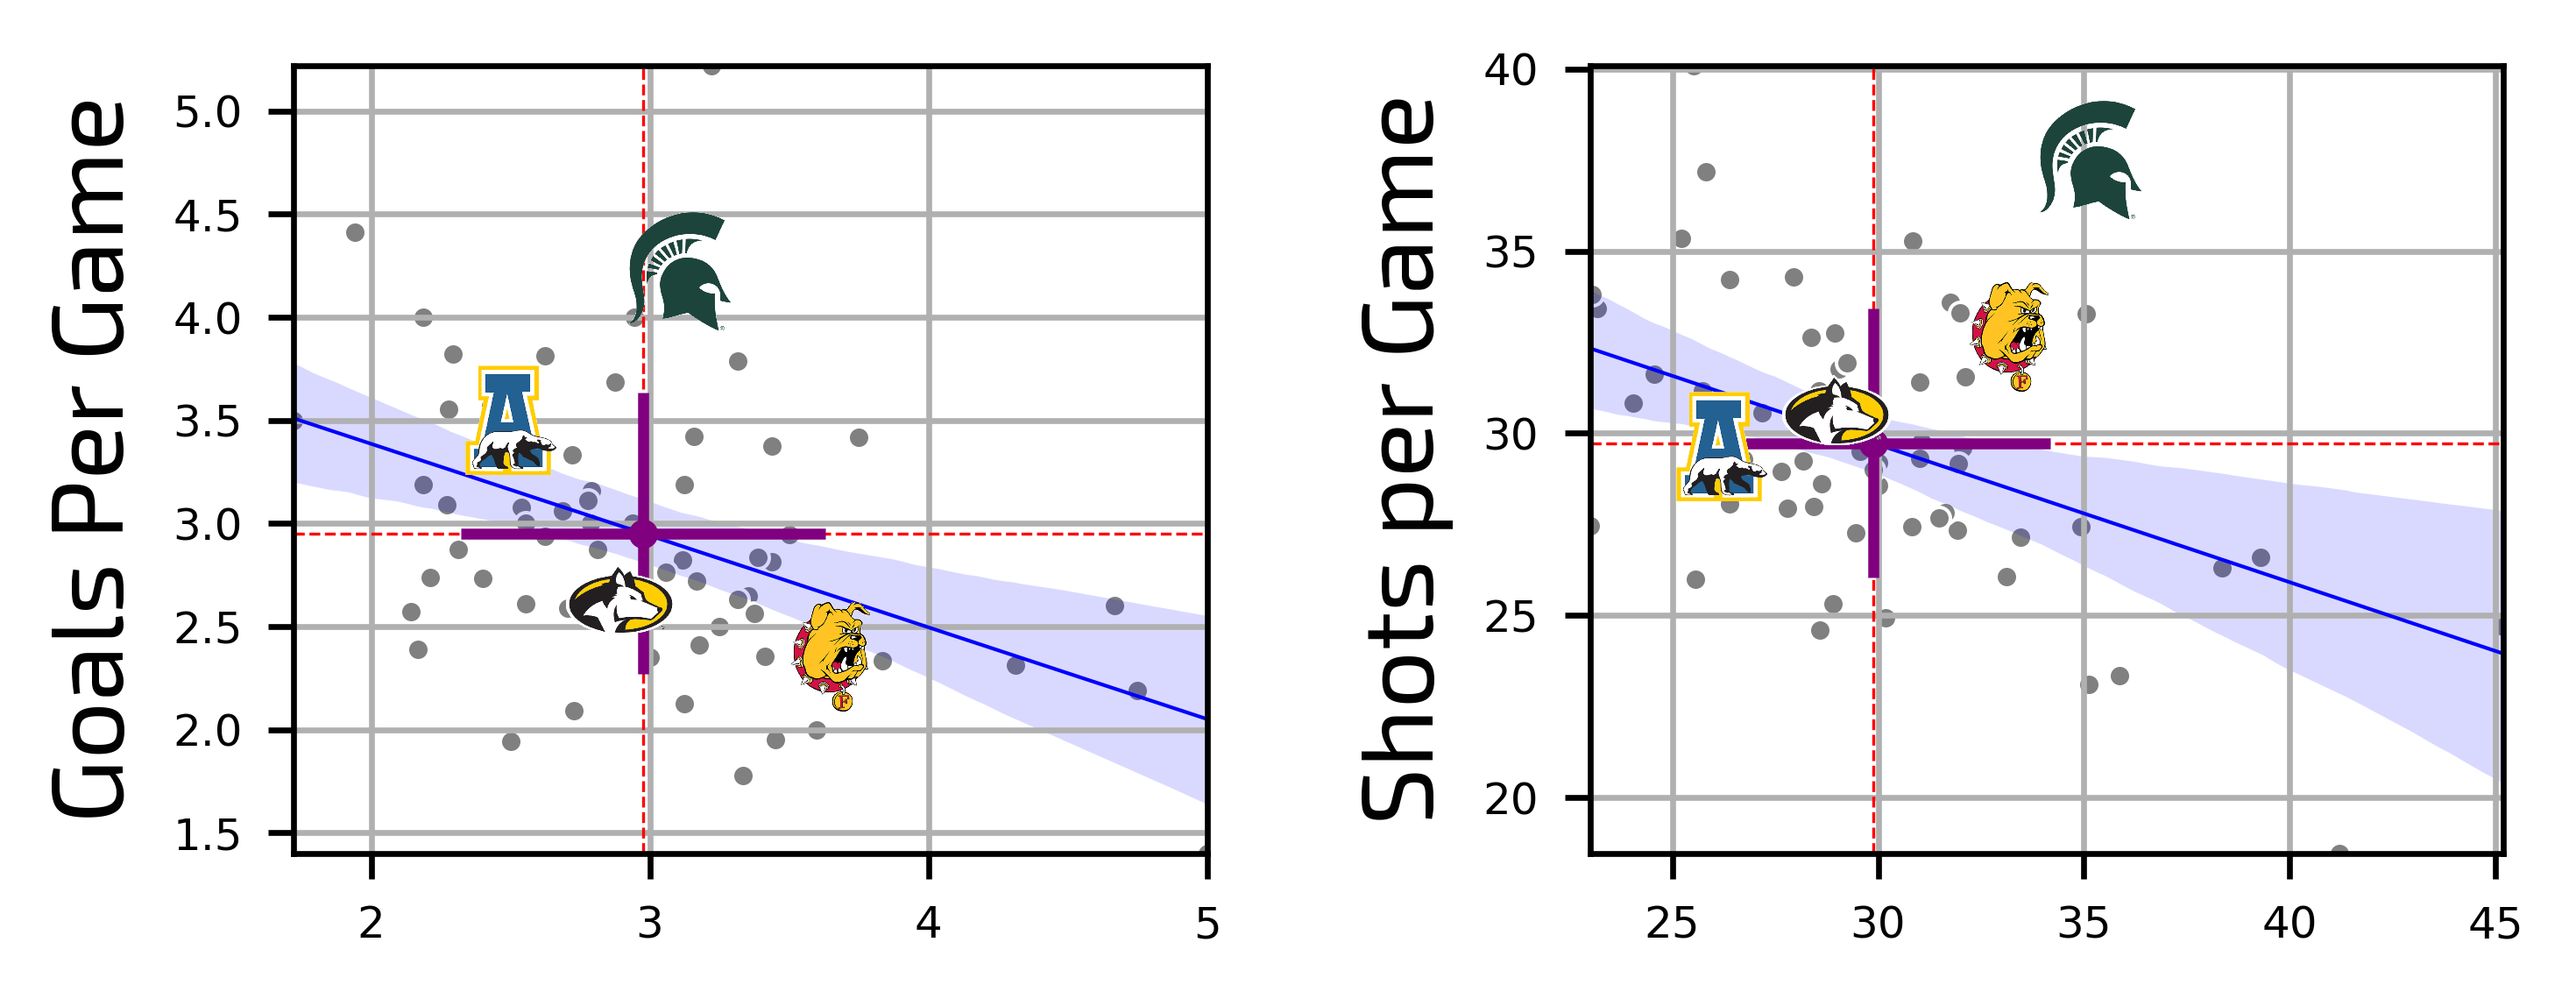

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(ax, df, x_col, y_col, avg_x, avg_y, std_x, std_y, team_colors, logo_mapping, title, y_label, font_title_param):
    # Set axis limits
    ax.set_xlim([df[x_col].min(), df[x_col].max()])
    ax.set_ylim([df[y_col].min(), df[y_col].max()])

    # Scatter plot background data
    sns.scatterplot(data=df, x=x_col, y=y_col, color='grey', marker=".", ax=ax)
    # Add trend line
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color='blue', ax=ax, line_kws={'linewidth':0.5})
    # Add average lines
    ax.axhline(y=avg_y, color='red', linestyle='--', linewidth=0.4)
    ax.axvline(x=avg_x, color='red', linestyle='--', linewidth=0.4)
    # Add standard deviation lines
    ax.errorbar(avg_x, avg_y, xerr=std_x, yerr=std_y, color='purple', fmt='.')

    # Add logos
    add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax=ax)

    # Add title and axis labels
    ax.set_xlabel('')
    ax.set_ylabel(y_label, fontdict=font_title_param)
    ax.tick_params(axis='both', which='major', labelsize=6)

# Usage example
fig, axs = plt.subplots(1, 2, figsize=(5, 2), dpi=600)
# GOALS - SHOTS
plot_data(axs[0], avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', avg_goals_allowed, avg_goals_scored, std_goals_allowed, std_goals_scored, team_colors, logo_mapping, 'Goals Per Game', 'Goals Per Game', font_title_param)
plot_data(axs[1], avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', avg_shots_allowed, avg_shots_taken, std_shots_allowed, std_shots_taken, team_colors, logo_mapping, 'Shots per Game', 'Shots per Game', font_title_param)


# # PIM PLUS MINUS
# plot_data(axs[0], avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', avg_against, avg_for, std_against, std_for, team_colors, logo_mapping, 'PIM per Game', 'PIM per Game', font_title_param)
# # PP PK
# plot_data(axs[1], penalty_data, 'PK%', 'PP%', penalty_data['PK%'].mean(), penalty_data['PP%'].mean(), penalty_data['PK%'].std(), penalty_data['PP%'].std(), team_colors, logo_mapping, 'Special Teams', 'Power Play %', font_title_param)


for ax in axs.flat:
    ax.grid(True)

# Layout   
plt.tight_layout()

# Save plot (Transparent background)
plt.savefig(f'{TEMP_FOLDER}team_comparison2.png', bbox_inches='tight', dpi=600, transparent=True)

plt.show()


## Stats by Class Rank

In [10]:
# ###### HOTFIX FOR TICKS ######
# font_tick_param = {'family': 'Robo', 'weight': 'bold', 'size': 12}

away_games_df = pd.read_sql("""
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM game_details
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM game_details
GROUP BY Home_Team;
""", conn)


games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

games_played_count.tail()

class_rank_stats_df = pd.read_sql("""
SELECT
    mr.Yr,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.plus_minus) AS Total_Plus_Minus,
    SUM(ps.PIM) AS Total_PIM
    
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Yr, ps.Team
ORDER BY mr.Yr, ps.Team;
""", conn)



final_df = pd.merge(class_rank_stats_df, games_played_count, how='left', on='Team')
# # # ## Calculate the average stats per class
final_df['AVG_Goals'] = final_df['Total_Goals'] / final_df['Num_Games']
final_df['AVG_Assists'] = final_df['Total_Assists'] / final_df['Num_Games']
final_df['AVG_Points'] = final_df['Total_Points'] / final_df['Num_Games']
final_df['AVG_PIM'] = final_df['Total_PIM'] / final_df['Num_Games']
final_df['AVG_Shots'] = final_df['Total_Shots'] / final_df['Num_Games']
final_df['AVG_Plus_Minus'] = final_df['Total_Plus_Minus'] / final_df['Num_Games']


final_df.head(20)

##### Create the filtered dataframe for the two teams we want to highlight
final_df_filtered = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2) | (final_df['Team'] == team_3) | (final_df['Team'] == team_4)]

# Set the order of the class ranks
class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Function to create individual plots for each metric
def create_metric_plot(metric, title, bg_img, alpha_value, ax):
  
    

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order, zorder=1)

    # Overlay larger, more opaque bars for Michigan State and Boston College
        # Overlay larger, more opaque bars for specified teams
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=class_rank_order, edgecolor='black', linewidth=1, hue_order=team_order,
                zorder=3)
    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Add Shading to plot to highlight each x value - alternating lightgrey and lightyellow
    for i in range(len(class_rank_order)):
        if i % 2 == 0:
            ax.axvspan(i - 0.5, i + 0.5, facecolor='lightgrey', alpha=0.5, zorder=0)
        else:
            ax.axvspan(i - 0.5, i + 0.5, facecolor='lightyellow', alpha=0.5, zorder=0)
                # Add the x ticks and labels but only to the fisrt plot and above the plot
        # if i == 0:
        #     # ax[i].set_xticks(period_ticks)
        #     # ax[i].set_xticklabels(period_labels)
        #     # ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True, labelsize=12)
        #     # Set tick marks to go on top of the plot
        #     ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True)
        #     # Remove tick marks from bottom of plot
        #     ax[i].tick_params(axis='x', which='major', bottom=False, labelbottom=False)
        #     # ax[i].set_xlabel('Game Time', font_label_param)

        # else:        
        #     # Remove tick labels from all but plot 1
        #     ax[i].set_xticklabels([])

    # Add Shading to plot to highlight each x value - alternating lightgrey and lightyellow



    # Add labels and title
    ax.set_ylabel(title, fontsize=14)
    # Remove x label
    ax.set_xlabel('')

    
    plt.xlabel('', font_label_param)
    # plt.ylabel("", font_label_large_param)
    
    
    # Tick labels
    # ax.set_xticklabels(ax.get_xticklabels(), **font_tick_large_param)
    # ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)



## Combine those 4 plots into a single graphic if we want to use

C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3985923092.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3985923092.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3985923092.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3985923092.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3985923092.py:70: FutureWarning: 

The `ci` paramete

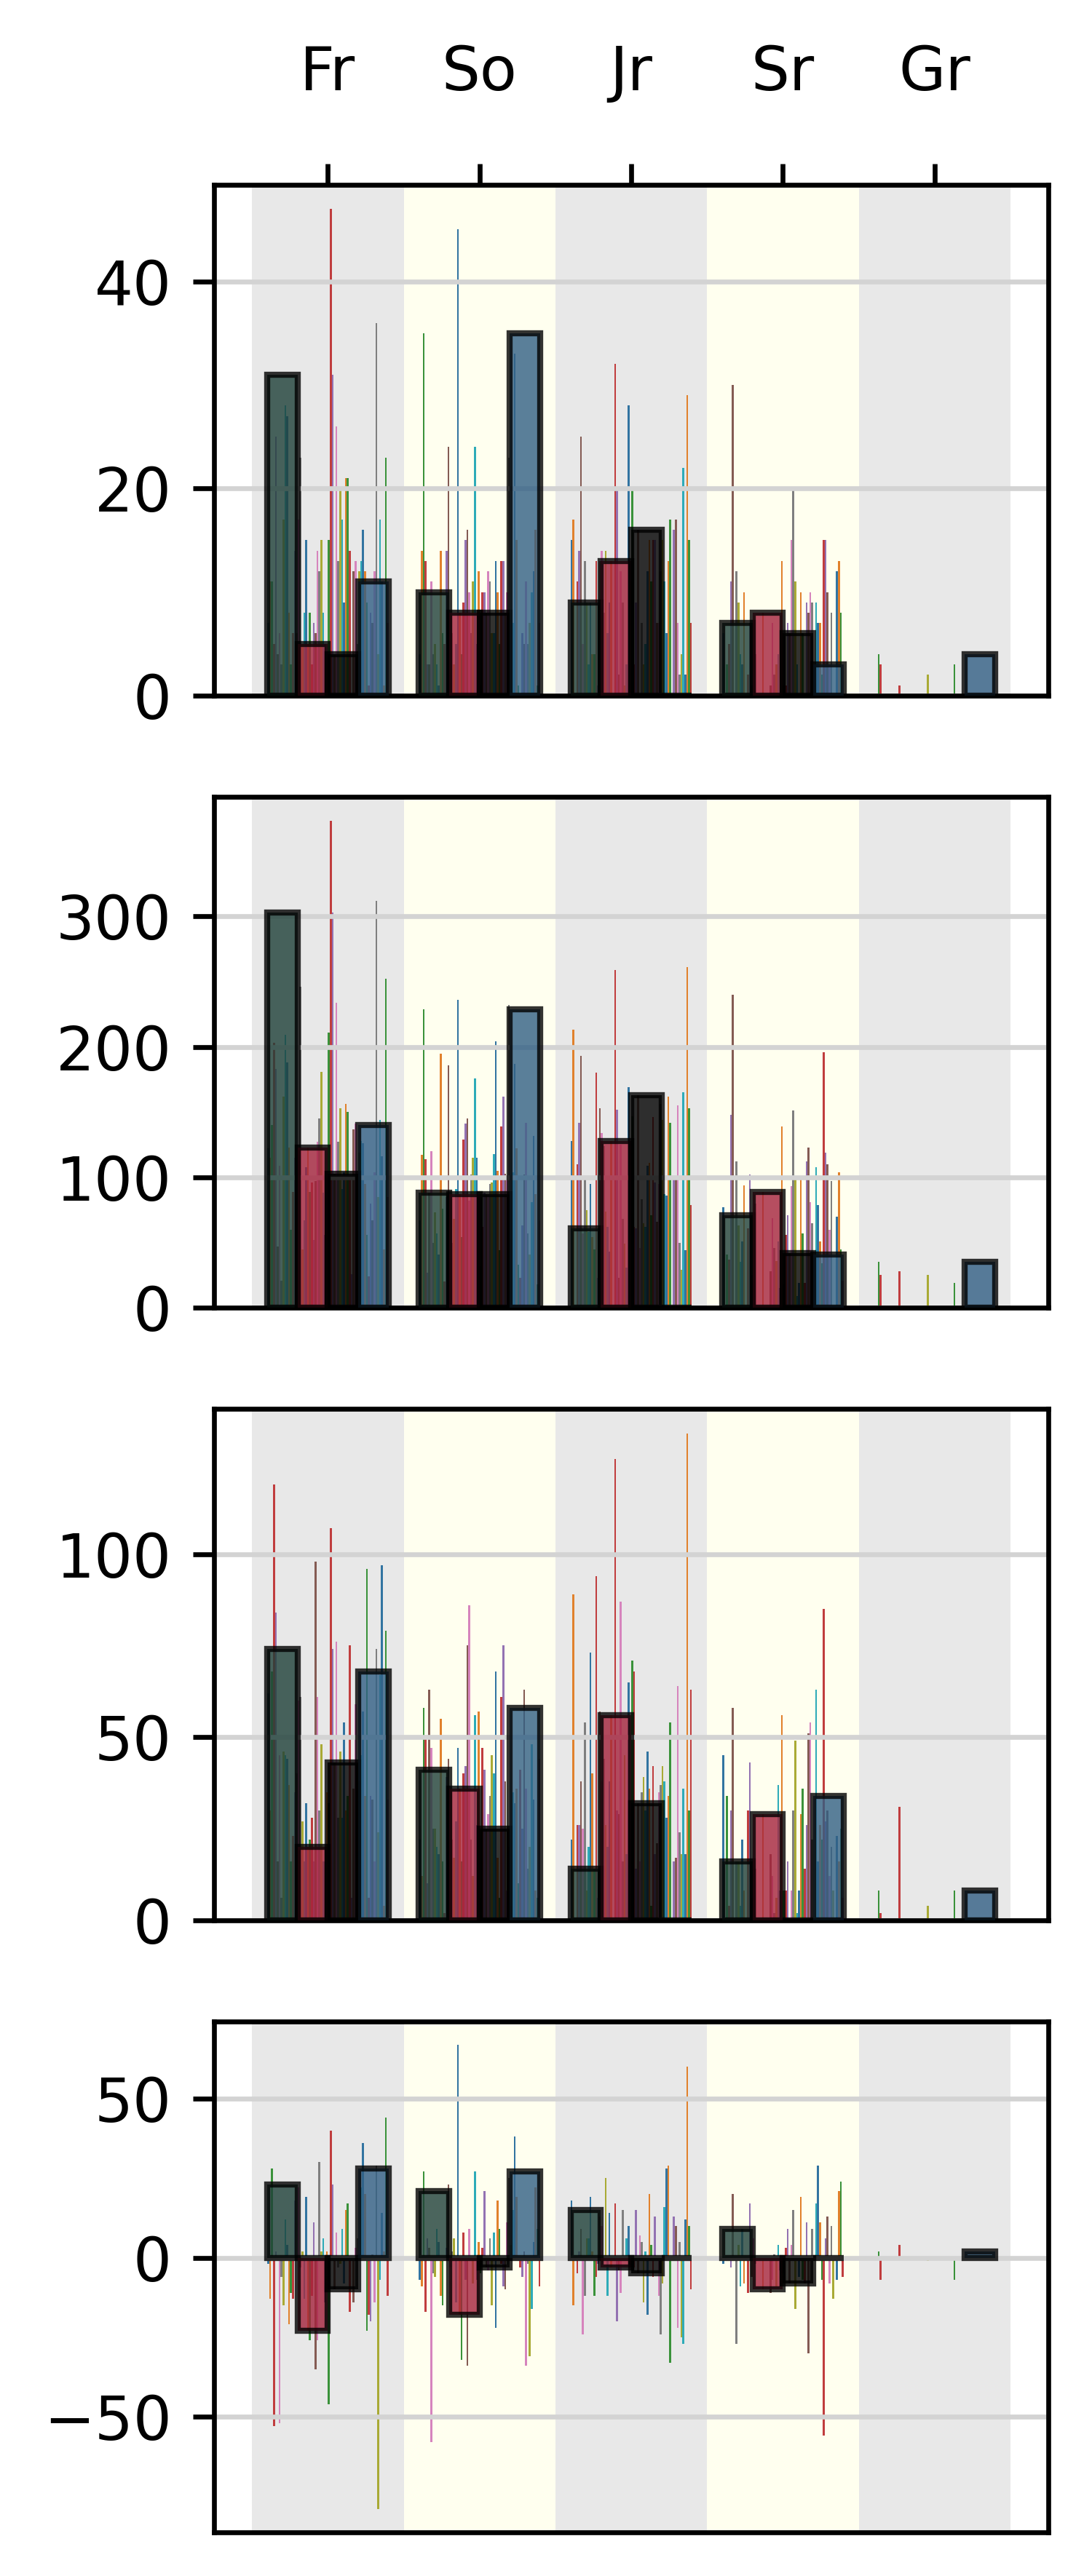

In [11]:
########## Create a 2 x 2 grid of CLASS RANK plots ##########
# Create the figure and axes
single_column_4_by_1 = (2.6, 6)

fig, axs = plt.subplots(4, 1, figsize=single_column_4_by_1, dpi=dpi)


########### TOTAL STATS INSTEAD OF PER GAME ###########
# Create the plots
create_metric_plot('Total_Goals', 'Goals', bg_img, alpha_value, ax=axs[0])
create_metric_plot('Total_Plus_Minus', '+/-', bg_img, alpha_value, ax=axs[3])
# create_metric_plot('AVG_Points', 'Points per Game', bg_img, alpha_value, ax=axs[0,1])
create_metric_plot('Total_PIM', 'PIM', bg_img, alpha_value, ax=axs[2])
create_metric_plot('Total_Shots', 'Shots', bg_img, alpha_value, ax=axs[1])


# Add a title
# fig.suptitle('Class Rank Stats', fontsize=16)



# Remove legends in any of the plots
for ax in axs.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# ADD HORIZONTAL GRIDS TO ALL PLOTS - lines light grey and behind the bars
for ax in axs.flat:
    ax.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.8, zorder=1)

# # Remove all x tick labels except from the top of the first plot
#         # Add the x ticks and labels but only to the fisrt plot and above the plot
#     if i == 0:
#         # ax[i].set_xticks(period_ticks)
#         # ax[i].set_xticklabels(period_labels)
#         # ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True, labelsize=12)

#         # Set tick marks to go on top of the plot
#         ax[1].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True)
#         # Remove tick marks from bottom of plot
#         ax[1].tick_params(axis='x', which='major', bottom=False, labelbottom=False)
#         # ax[i].set_xlabel('Game Time', font_label_param)

#     else:        
#         # Remove tick labels from all but plot 1
#         ax[i].set_xticklabels([])


# ADD A TITLE TO THE ENTIRE FIGURE
# fig.suptitle('Class Rank', **font_title_param)



#add xtick labels to top plot on top of the plot
axs[0].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True)




# Remove xtick labels except for the top plot[0]
for ax in axs.flat:
    if ax != axs[0]:
        ax.tick_params(axis='x', which='major', bottom=False, labelbottom=False)
        # Remove x ticks and label from bottom of plot [0]
        axs[0].tick_params(axis='x', which='major', bottom=False, labelbottom=False)
        

# # Remove x tick labels from the bottome of the first plot
# ax[0].tick_params(axis='x', which='major', bottom=False, labelbottom=False)

# Remove y labels 
for ax in axs.flat:
    ax.set_ylabel('')

# Adjust the spacing between plots




fig.tight_layout()



# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

plt.savefig(f'{TEMP_FOLDER}Class_Rank_Stats.png', bbox_inches='tight', transparent=True, dpi=dpi)

# Show the plot
plt.show()

## Line By Line Breakdown

#### To Do
- Remove 4th line from defensive plot
- re work to a 3 x 2 graph for half page


In [12]:


# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# # set the font style for the title
# # title = fig.suptitle('Goals per Game by Line', **font_title_param)

# # Adjust padding and plot borders
# plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)






# # Filter data for Forwards and Defensemen
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
#             color='grey', alpha=0.6, ax=ax[0], ci=None)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Plot data for Defensemen
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
#             color='grey', alpha=0.6, ax=ax[1], ci=None, linewidth=2)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Add labels and title
# ax[0].set_title('Goals Per Game by Line', font_title_param)
# # ax[1].set_title('Defensemen', font_label_large_param)
# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Pair', font_label_param)
# ax[0].set_ylabel('Forwards', font_label_large_param)
# ax[1].set_ylabel('Defensemen', font_label_large_param)


# # # Create the legend
# # handles, labels = ax[0].get_legend_handles_labels()
# # ax[0].legend(handles[-4:], labels[-4:], title='Team')

# # handles, labels = ax[1].get_legend_handles_labels()
# # ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # # Drop Legend if there is any
# if ax[0].get_legend() is not None:
#     ax[0].get_legend().remove()
# if ax[1].get_legend() is not None:
#     ax[1].get_legend().remove()

# # Change font size of tick labels
# ax[0].tick_params(axis='both', which='major', labelsize=14)
# ax[1].tick_params(axis='both', which='major', labelsize=14)

# # Change Font Size of y axis labels
# ax[0].yaxis.label.set_size(32)
# ax[1].yaxis.label.set_size(32)

# ### Add Source and Signature Tags
# # add_source_sig_text()

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# # Save Plot
# plt.savefig(f'{save_path}Goals_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# # Show the plot
# plt.show()

In [13]:
# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# # set the font style for the title
# # title = fig.suptitle('Goals per Game by Line', **font_title_param)

# # Adjust padding and plot borders
# plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)


# # Filter data for Forwards and Defensemen
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data, 
#             color='grey', alpha=0.6, ax=ax[0], ci=None)
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Plot data for Defensemen
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data, 
#             color='grey', alpha=0.6, ax=ax[1], ci=None)
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Add labels and title
# ax[0].set_title('Points Per Game by Line', font_title_param)
# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Pair', font_label_param)
# ax[0].set_ylabel('Forwards', font_label_large_param)
# ax[1].set_ylabel('Defensemen', font_label_large_param)

# # Change Font Size of y axis labels
# ax[0].yaxis.label.set_size(32)
# ax[1].yaxis.label.set_size(32)

# # ax[0].set_xlabel('Line', font_label_param)
# # ax[1].set_xlabel('Line', font_label_param)



# # Simplify the legend to only show Michigan State and Boston College
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles[-2:], labels[-2:], title='Team')

# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # # Drop Legend if there is any
# if ax[0].get_legend() is not None:
#     ax[0].get_legend().remove()
# if ax[1].get_legend() is not None:
#     ax[1].get_legend().remove()

# # Change font size of tick labels
# ax[0].tick_params(axis='both', which='major', labelsize=18)
# ax[1].tick_params(axis='both', which='major', labelsize=18)

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# ### Add Source and Signature Tags
# # add_source_sig_text()

# # Save Plot
# plt.savefig(f'{save_path}Points_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# # Show the plot
# plt.show()

## 4 x 2 Plot of Stats by Line & Position

In [14]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
SELECT
    lc.Team,
    lc.Line,
    lc.Position,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.plus_minus) AS Total_Plus_Minus,
    SUM(ps.PIM) AS Total_PIM
FROM line_chart AS lc
LEFT JOIN player_stats AS ps ON lc.Game_ID = ps.Game_ID AND lc.Team = ps.Team AND lc.Player = ps.Player
WHERE lc.Position != 'Goalie'
GROUP BY lc.Team, lc.Line, lc.Position
ORDER BY lc.Team, lc.Line, lc.Position;
"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Step 1: Create 'Type' column
# (You've already done this part)
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(
    lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense'
)

# Step 2: Aggregate again by 'Type'
agg_columns = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Total_Points', 'Total_Shots', 'Total_Plus_Minus']
grouped_df = line_goals_assists_pim_position_df.groupby(['Team', 'Line', 'Type'])[agg_columns].sum().reset_index()

# Now, you can merge the 'Num_Games' and calculate the averages as before
grouped_df = pd.merge(grouped_df, games_played_count, how='left', on='Team')

# Calculate the average stats per game
grouped_df['AVG_Goals'] = grouped_df['Total_Goals'] / grouped_df['Num_Games']
grouped_df['AVG_Assists'] = grouped_df['Total_Assists'] / grouped_df['Num_Games']
grouped_df['AVG_Points'] = grouped_df['Total_Points'] / grouped_df['Num_Games']
grouped_df['AVG_PIM'] = grouped_df['Total_PIM'] / grouped_df['Num_Games']
grouped_df['AVG_Shots'] = grouped_df['Total_Shots'] / grouped_df['Num_Games']
grouped_df['AVG_Plus_Minus'] = grouped_df['Total_Plus_Minus'] / grouped_df['Num_Games']


# Rename grouped_df to line_goals_assists_pim_position_df
line_goals_assists_pim_position_df = grouped_df

## NEWly Refactored line by line stats

C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3043836767.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3043836767.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3043836767.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=data[data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\3043836767.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y=stat, hue='Team', data=data,
C:\Users\Justin\AppData\Local

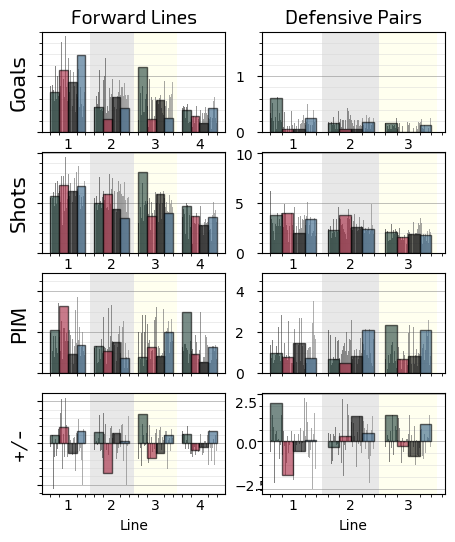

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to plot data
def plot_data(data, stat, ax, team_colors, set_linewidth):
    sns.barplot(x='Line', y=stat, hue='Team', data=data, 
                color=all_color, alpha=0.6, ax=ax, ci=None)
    sns.barplot(x='Line', y=stat, hue='Team', data=data[data['Team'].isin([team_1, team_2, team_3, team_4])], 
                palette=team_colors, ax=ax, ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth, hue_order=team_order)
    

# Function to add background shading
def add_background_shading(ax, x_breaks, colors):
    for i, color in zip(x_breaks, colors):
        ax.axvspan(i[0], i[1], facecolor=color, alpha=0.5, zorder=0)

# Data Prep
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']
defense_data = defense_data[defense_data['Line'] != '4']

# Plot Layout
fig, ax = plt.subplots(4, 2, figsize=(5.2, 6))

# Plotting AVG STATS 
stats = ['AVG_Goals', 'AVG_Shots', 'AVG_PIM', 'AVG_Plus_Minus']
for i, stat in enumerate(stats):
    plot_data(forwards_data, stat, ax[i, 0], team_colors, set_linewidth)
    plot_data(defense_data, stat, ax[i, 1], team_colors, set_linewidth)

    # Background shading
    forward_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5), (3.5, 4.5)]
    defense_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5)]
    colors = ['lightgrey', 'lightyellow']
    add_background_shading(ax[i, 0], forward_x_breaks, colors)
    add_background_shading(ax[i, 1], defense_x_breaks, colors)




# # Plotting TOTALS IN PLACE OF AVG
# stats = ['Total_Goals', 'Total_Shots', 'Total_PIM', 'Total_Plus_Minus']
# for i, stat in enumerate(stats):
#     plot_data(forwards_data, stat, ax[i, 0], team_colors, set_linewidth)
#     plot_data(defense_data, stat, ax[i, 1], team_colors, set_linewidth)

#     # Background shading
#     forward_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5), (3.5, 4.5)]
#     defense_x_breaks = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5)]
#     colors = ['lightgrey', 'lightyellow']
#     add_background_shading(ax[i, 0], forward_x_breaks, colors)
#     add_background_shading(ax[i, 1], defense_x_breaks, colors)


# After plotting all data, adjust y-axis limits
for i in range(3): # Assuming 4 rows of subplots - the last is plus minus with neg values and thisis causing problem
    max_ylim = max(ax[i, 0].get_ylim()[1], ax[i, 1].get_ylim()[1]) # Find the maximum y limit in the row
    ax[i, 0].set_ylim(0, max_ylim) # Set y-axis limit for forwards
    ax[i, 1].set_ylim(0, max_ylim) # Set y-axis limit for defense




###########################

ax[0, 0].set_ylabel('Goals', font_label_large_param)
ax[1, 0].set_ylabel('Shots', font_label_large_param)
ax[2,0].set_ylabel('PIM', font_label_large_param)
ax[3,0].set_ylabel('+/-', font_label_large_param)

# Remove Y Labels Defence plots
ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2,1].set_ylabel('')
ax[3,1].set_ylabel('')

# switch side of plot tick labels are on for all
ax[0, 0].tick_params(axis='y', labelleft=False, labelright=True)
ax[0, 1].tick_params(axis='y', labelleft=False, labelright=False)
ax[1, 0].tick_params(axis='y', labelleft=False, labelright=True)
ax[1, 1].tick_params(axis='y', labelleft=False, labelright=False)
ax[2,0].tick_params(axis='y', labelleft=False, labelright=True)
ax[2,1].tick_params(axis='y', labelleft=False, labelright=False)
ax[3,0].tick_params(axis='y', labelleft=False, labelright=True)
ax[3,1].tick_params(axis='y', labelleft=False, labelright=False)

# Set x tick marks to off on all plots
ax[0, 0].tick_params(axis='x', which='major', length=0)
ax[0, 1].tick_params(axis='x', which='major', length=0)
ax[1, 0].tick_params(axis='x', which='major', length=0)
ax[1, 1].tick_params(axis='x', which='major', length=0)
ax[2,0].tick_params(axis='x', which='major', length=0)
ax[2,1].tick_params(axis='x', which='major', length=0)
ax[3,0].tick_params(axis='x', which='major', length=0)
ax[3,1].tick_params(axis='x', which='major', length=0)







# change font size of tick labels
ax[0, 0].tick_params(axis='both', which='major', labelsize=10)
ax[0, 1].tick_params(axis='both', which='major', labelsize=10)
ax[1, 0].tick_params(axis='both', which='major', labelsize=10)
ax[1, 1].tick_params(axis='both', which='major', labelsize=10)


# Set Labels

# Remove X Labels from all plots
ax[0, 0].set_xlabel('', font_label_param)
ax[0, 1].set_xlabel('', font_label_param)
ax[1, 0].set_xlabel('', font_label_param)
ax[1, 1].set_xlabel('', font_label_param)
ax[2,0].set_xlabel('', font_label_param)
ax[2,1].set_xlabel('', font_label_param) 

# Move to the title
ax[0, 0].set_title('Forward Lines', font_title_param)
ax[0, 1].set_title('Defensive Pairs', font_title_param)

### Remove the x labels from bottom plots
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')

ax[2, 0].set_xticklabels([])
ax[2, 1].set_xticklabels([])



#################
### ADD GRID MARKS
data = line_goals_assists_pim_position_df

for i in range(4):
    for j in range(2):
        

        # Set grid lines to go behind plot elements
        ax[i, j].set_axisbelow(True)

        # Add major grid lines
        ax[i, j].grid(
            color='grey', 
            linestyle='-', 
            linewidth=0.5, 
            alpha=0.7, 
            which='major', 
            axis='y'
        )

        # Add minor grid lines
        ax[i, j].minorticks_on()  # Enable minor ticks
        ax[i, j].grid(
            color='lightgrey',
            linestyle='-',
            linewidth=0.5,
            alpha=0.6,
            which='minor',
            axis='y'
        )

# Simplify the legend (example for the first subplot)
handles, labels = ax[0, 0].get_legend_handles_labels()
ax[0, 0].legend(handles[-2:], labels[-2:], title='Team')

# Remove Legend
for axis in ax.flat:
    if axis.get_legend() is not None:
        axis.get_legend().remove()

    save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Line_by_Line.png', bbox_inches='tight', dpi=dpi, transparent=True) #TURN ON TRANPARENTCY WITH THIS


# Show the plot
plt.show()


#### temp


In [16]:
# # Set up the plot

# ### FIG SIZES FOR PROGRAM
# ## TOTAL PRINTABLE AREA ON LETTER SIZE PAPER IS 8 x 10.6

# ### HALF PAGE ON LETTER SIZE PAPER IS 4 x 5.3
# # fig, ax = plt.subplots(1, 2, figsize=(4, 5.3))
# # fig, ax = plt.subplots(3, 2, figsize=(7.5, 4))

# # PORTRAIT LAYOUT FOR 4 PLOT STACK - ADDING +/-
# fig, ax = plt.subplots(4, 2, figsize=(5.2, 6))

# ## OTHER PARAMS
# # Line Width
# set_linewidth = .5

# ## FONT PARAMETERS
# font_title_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 14}
# font_label_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 8}
# font_tick_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 6}
# font_label_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 12}
# font_tick_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 6}

# font_tag_parm = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'bold', 'size': 10}

# #### Set color of background data
# all_color = 'red'
# #####################################################
# ############# GOALS ############################
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']
# # Remove Line 4
# defense_data = defense_data[defense_data['Line'] != '4']

# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
#             color=all_color, alpha=0.6, ax=ax[0,0], ci=None)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[0,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# # Plot data for Defensemen
# # Set y axis equal to Forwards
# ax[0,1].set_ylim(ax[0,0].get_ylim()) # Set y axis equal to Forwards

# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
#             color=all_color, alpha=0.6, ax=ax[0,1], ci=None, linewidth=2)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[0,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# #####################################################
# ######### SHOTS PER GAME ############################
# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data, 
#             color=all_color, alpha=0.6, ax=ax[1,0], ci=None)
# sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# # Plot data for Defensemen

# ax[1,1].set_ylim(ax[1,0].get_ylim()) # Set y axis equal to Forwards
# sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data, 
#             color= all_color, alpha=0.6, ax=ax[1,1], ci=None)
# sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)


# ######################### PLUS MINUS ############################
# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data, 
#             color=all_color, alpha=0.6, ax=ax[3,0], ci=None)
# sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[3,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# # Defencemen
# # Plot data for Defensemen
# # Set y axis equal to Forwards
# ax[3,1].set_ylim(ax[3,0].get_ylim()) # Set y axis equal to Forwards

# sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data,
#             color=all_color, alpha=0.6, ax=ax[3,1], ci=None, linewidth=2)
# sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[3,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)


# ######################### END ############################

# #####################################
# ############## PENALTY MINUTES ######

# # Plot PIM for Forwards
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data, 
#             color= all_color, alpha=0.6, ax=ax[2,0], ci=None)
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[2,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# # Plot PIM for Defensemen
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data, 
#             color= all_color, alpha=0.6, ax=ax[2,1], ci=None)
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[2,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)









# ###########################

# ax[0, 0].set_ylabel('Goals', font_label_large_param)
# ax[1, 0].set_ylabel('Shots', font_label_large_param)
# ax[2,0].set_ylabel('PIM', font_label_large_param)
# ax[3,0].set_ylabel('+/-', font_label_large_param)

# # Remove Y Labels Defence plots
# ax[0, 1].set_ylabel('')
# ax[1, 1].set_ylabel('')
# ax[2,1].set_ylabel('')
# ax[3,1].set_ylabel('')

# # switch side of plot tick labels are on for all
# ax[0, 0].tick_params(axis='y', labelleft=False, labelright=True)
# ax[0, 1].tick_params(axis='y', labelleft=False, labelright=False)
# ax[1, 0].tick_params(axis='y', labelleft=False, labelright=True)
# ax[1, 1].tick_params(axis='y', labelleft=False, labelright=False)
# ax[2,0].tick_params(axis='y', labelleft=False, labelright=True)
# ax[2,1].tick_params(axis='y', labelleft=False, labelright=False)
# ax[3,0].tick_params(axis='y', labelleft=False, labelright=True)
# ax[3,1].tick_params(axis='y', labelleft=False, labelright=False)

# # Set x tick marks to off on all plots
# ax[0, 0].tick_params(axis='x', which='major', length=0)
# ax[0, 1].tick_params(axis='x', which='major', length=0)
# ax[1, 0].tick_params(axis='x', which='major', length=0)
# ax[1, 1].tick_params(axis='x', which='major', length=0)
# ax[2,0].tick_params(axis='x', which='major', length=0)
# ax[2,1].tick_params(axis='x', which='major', length=0)
# ax[3,0].tick_params(axis='x', which='major', length=0)
# ax[3,1].tick_params(axis='x', which='major', length=0)







# # change font size of tick labels
# ax[0, 0].tick_params(axis='both', which='major', labelsize=10)
# ax[0, 1].tick_params(axis='both', which='major', labelsize=10)
# ax[1, 0].tick_params(axis='both', which='major', labelsize=10)
# ax[1, 1].tick_params(axis='both', which='major', labelsize=10)


# # Set Labels

# # Remove X Labels from all plots
# ax[0, 0].set_xlabel('', font_label_param)
# ax[0, 1].set_xlabel('', font_label_param)
# ax[1, 0].set_xlabel('', font_label_param)
# ax[1, 1].set_xlabel('', font_label_param)
# ax[2,0].set_xlabel('', font_label_param)
# ax[2,1].set_xlabel('', font_label_param) 



# # ax[0, 0].set_xlabel('', font_label_param)
# # ax[0, 1].set_xlabel('', font_label_param)
# # ax[0, 0].set_xlabel('Forward Lines', font_label_param)
# # ax[0, 1].set_xlabel('Defensive Pairs', font_label_param)
# # Move to the title
# ax[0, 0].set_title('Forward Lines', font_title_param)
# ax[0, 1].set_title('Defensive Pairs', font_title_param)

# ### Remove the x labels from bottom plots
# ax[1, 0].set_xlabel('')
# ax[1, 1].set_xlabel('')
# # Remove tick marks and tick mark labels from plots
# # ax[1, 0].tick_params(axis='x', which='major', length=0)
# # ax[1, 1].tick_params(axis='x', which='major', length=0)
# # ax[2, 0].tick_params(axis='x', which='major', length=0)
# # ax[2, 1].tick_params(axis='x', which='major', length=0)

# ax[2, 0].set_xticklabels([])
# ax[2, 1].set_xticklabels([])



# #################
# ### ADD GRID MARKS
# data = line_goals_assists_pim_position_df

# for i in range(4):
#     for j in range(2):
        

#         # Set grid lines to go behind plot elements
#         ax[i, j].set_axisbelow(True)

#         # Add major grid lines
#         ax[i, j].grid(
#             color='grey', 
#             linestyle='-', 
#             linewidth=0.5, 
#             alpha=0.7, 
#             which='major', 
#             axis='y'
#         )

#         # Add minor grid lines
#         ax[i, j].minorticks_on()  # Enable minor ticks
#         ax[i, j].grid(
#             color='lightgrey',
#             linestyle='-',
#             linewidth=0.5,
#             alpha=0.6,
#             which='minor',
#             axis='y'
#         )

# # Simplify the legend (example for the first subplot)
# handles, labels = ax[0, 0].get_legend_handles_labels()
# ax[0, 0].legend(handles[-2:], labels[-2:], title='Team')

# # Remove Legend
# for axis in ax.flat:
#     if axis.get_legend() is not None:
#         axis.get_legend().remove()

# # Shade the background of the plot in stripes, same light grey and light yellow as tempo plot
#         # Forward line backgrounds should break at 1.5,2.5,3.5 and 4.5
#         # Defense pair backgrounds should break at 1.5 and 2.5
#         # Should got lightgrey, lightyeallow, ect...
#         # Should be behind the grid lines

# for i in range(4):
#     for j in range(2):
        
#         ax[i, j].axvspan(0, 1.5, facecolor='lightgrey', alpha=0.5, zorder=0)
#         ax[i, j].axvspan(1.5, 2.5, facecolor='lightyellow', alpha=0.75, zorder=0)
#         ax[i, j].axvspan(2.5, 3.5, facecolor='lightgrey', alpha=0.5, zorder=0)
#         ax[i, j].axvspan(3.5, 4.5, facecolor='lightyellow', alpha=0.75, zorder=0)
#         ax[i, j].axvspan(4.5, 5.5, facecolor='lightgrey', alpha=0.5, zorder=0)
      
        
#         ax[i, j].axvspan(0, 1.5, facecolor='lightgrey', alpha=0.5, zorder=0)
#         ax[i, j].axvspan(1.5, 2.5, facecolor='lightyellow', alpha=0.75, zorder=0)
#         ax[i, j].axvspan(2.5, 3.5, facecolor='lightgrey', alpha=0.5, zorder=0)
        

        

# # #### Eaxample from other block
# #             # Set grid, background color, and border properties
# #     ax[i].grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
# #     ax[i].grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
# #     # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
# #     ax[i].axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
# #     ax[i].axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
# #     # Shade 2nd period and OT in light yeallow
# #     ax[i].axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
# #     ax[i].axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)
        
# for axis in ax.flat:
#     # Set grid, background color, and border properties
#     axis.grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
#     axis.grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
#     # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
#     axis.axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
#     axis.axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
#     # Shade 2nd period and OT in light yeallow
#     axis.axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
#     axis.axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)
        

# ### Add Source and Signature Tags
# # add_source_sig_text()

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# # Save Plot
# plt.savefig(f'{save_path}NEW_Three_plot_Layout.png', bbox_inches='tight', dpi=dpi, transparent=True) #TURN ON TRANPARENTCY WITH THIS


# # Show the plot
# plt.show()

In [17]:
# forwards_data.head()

## Goals by Time of Game

In [18]:
#### Refactor old code creat a 4 x 1 figure of the histogram of each teams goals scored throughout the game by game time

#### Refactoring from ORIG code in Adaptable Plotting Book
import matplotlib.ticker as ticker

## Functions
### get the basic info from the scoring summary table
def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time, Game_ID
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

### Convert the time to continuous time [0-65] for plotting
def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0

goals_time_df = fetch_goals_time_data(conn)

goals_time_df['Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)

goals_time_df.head()

# OUTPUT CSV in TEMP
goals_time_df.to_csv(f'{TEMP_FOLDER}goals_time_df.csv', index=False)

In [19]:
# Revised function to correctly parse team names, accounting for additional hyphens in team names
def infer_conceded_goals_corrected_v4(df):
    conceded_goals = []
    for index, row in df.iterrows():
        # Split the game ID to find the teams involved
        # Since teams can have hyphens in their names, we take all parts after the date
        game_id_parts = row['Game_ID'].split('-')
        teams_in_game = ['-'.join(game_id_parts[3:4]), '-'.join(game_id_parts[4:])]  # Correctly extract the team names
        # Identify the opposing team
        opposing_team = teams_in_game[1] if row['Team'] == teams_in_game[0] else teams_in_game[0]
        # Add a row for the conceded goal
        conceded_goals.append({'Team': opposing_team, 'Time': row['Time'], 'Game_ID': row['Game_ID']})
    
    # Create a DataFrame for conceded goals
    conceded_goals_df = pd.DataFrame(conceded_goals)
    return conceded_goals_df

# Create the corrected conceded goals dataframe
conceded_goals_df_corrected_v4 = infer_conceded_goals_corrected_v4(goals_time_df)

# Display the first few rows of the corrected conceded goals dataframe
# conceded_goals_df_corrected_v4.head()


In [20]:
### NEED TO CORRECT TEAM NAME- LEAVE OUT HYPHINES

conceded_goals_df_corrected_v4.value_counts('Team')

Team
Lindenwood          76
Stonehill           75
Alaska Anchorage    72
Rensselaer          70
Army                69
                    ..
Wisconsin           31
Dartmouth           30
Harvard             30
Clarkson            30
Cornell             25
Name: count, Length: 64, dtype: int64

### 4 x 1 Plot of goals scored and conceded by time

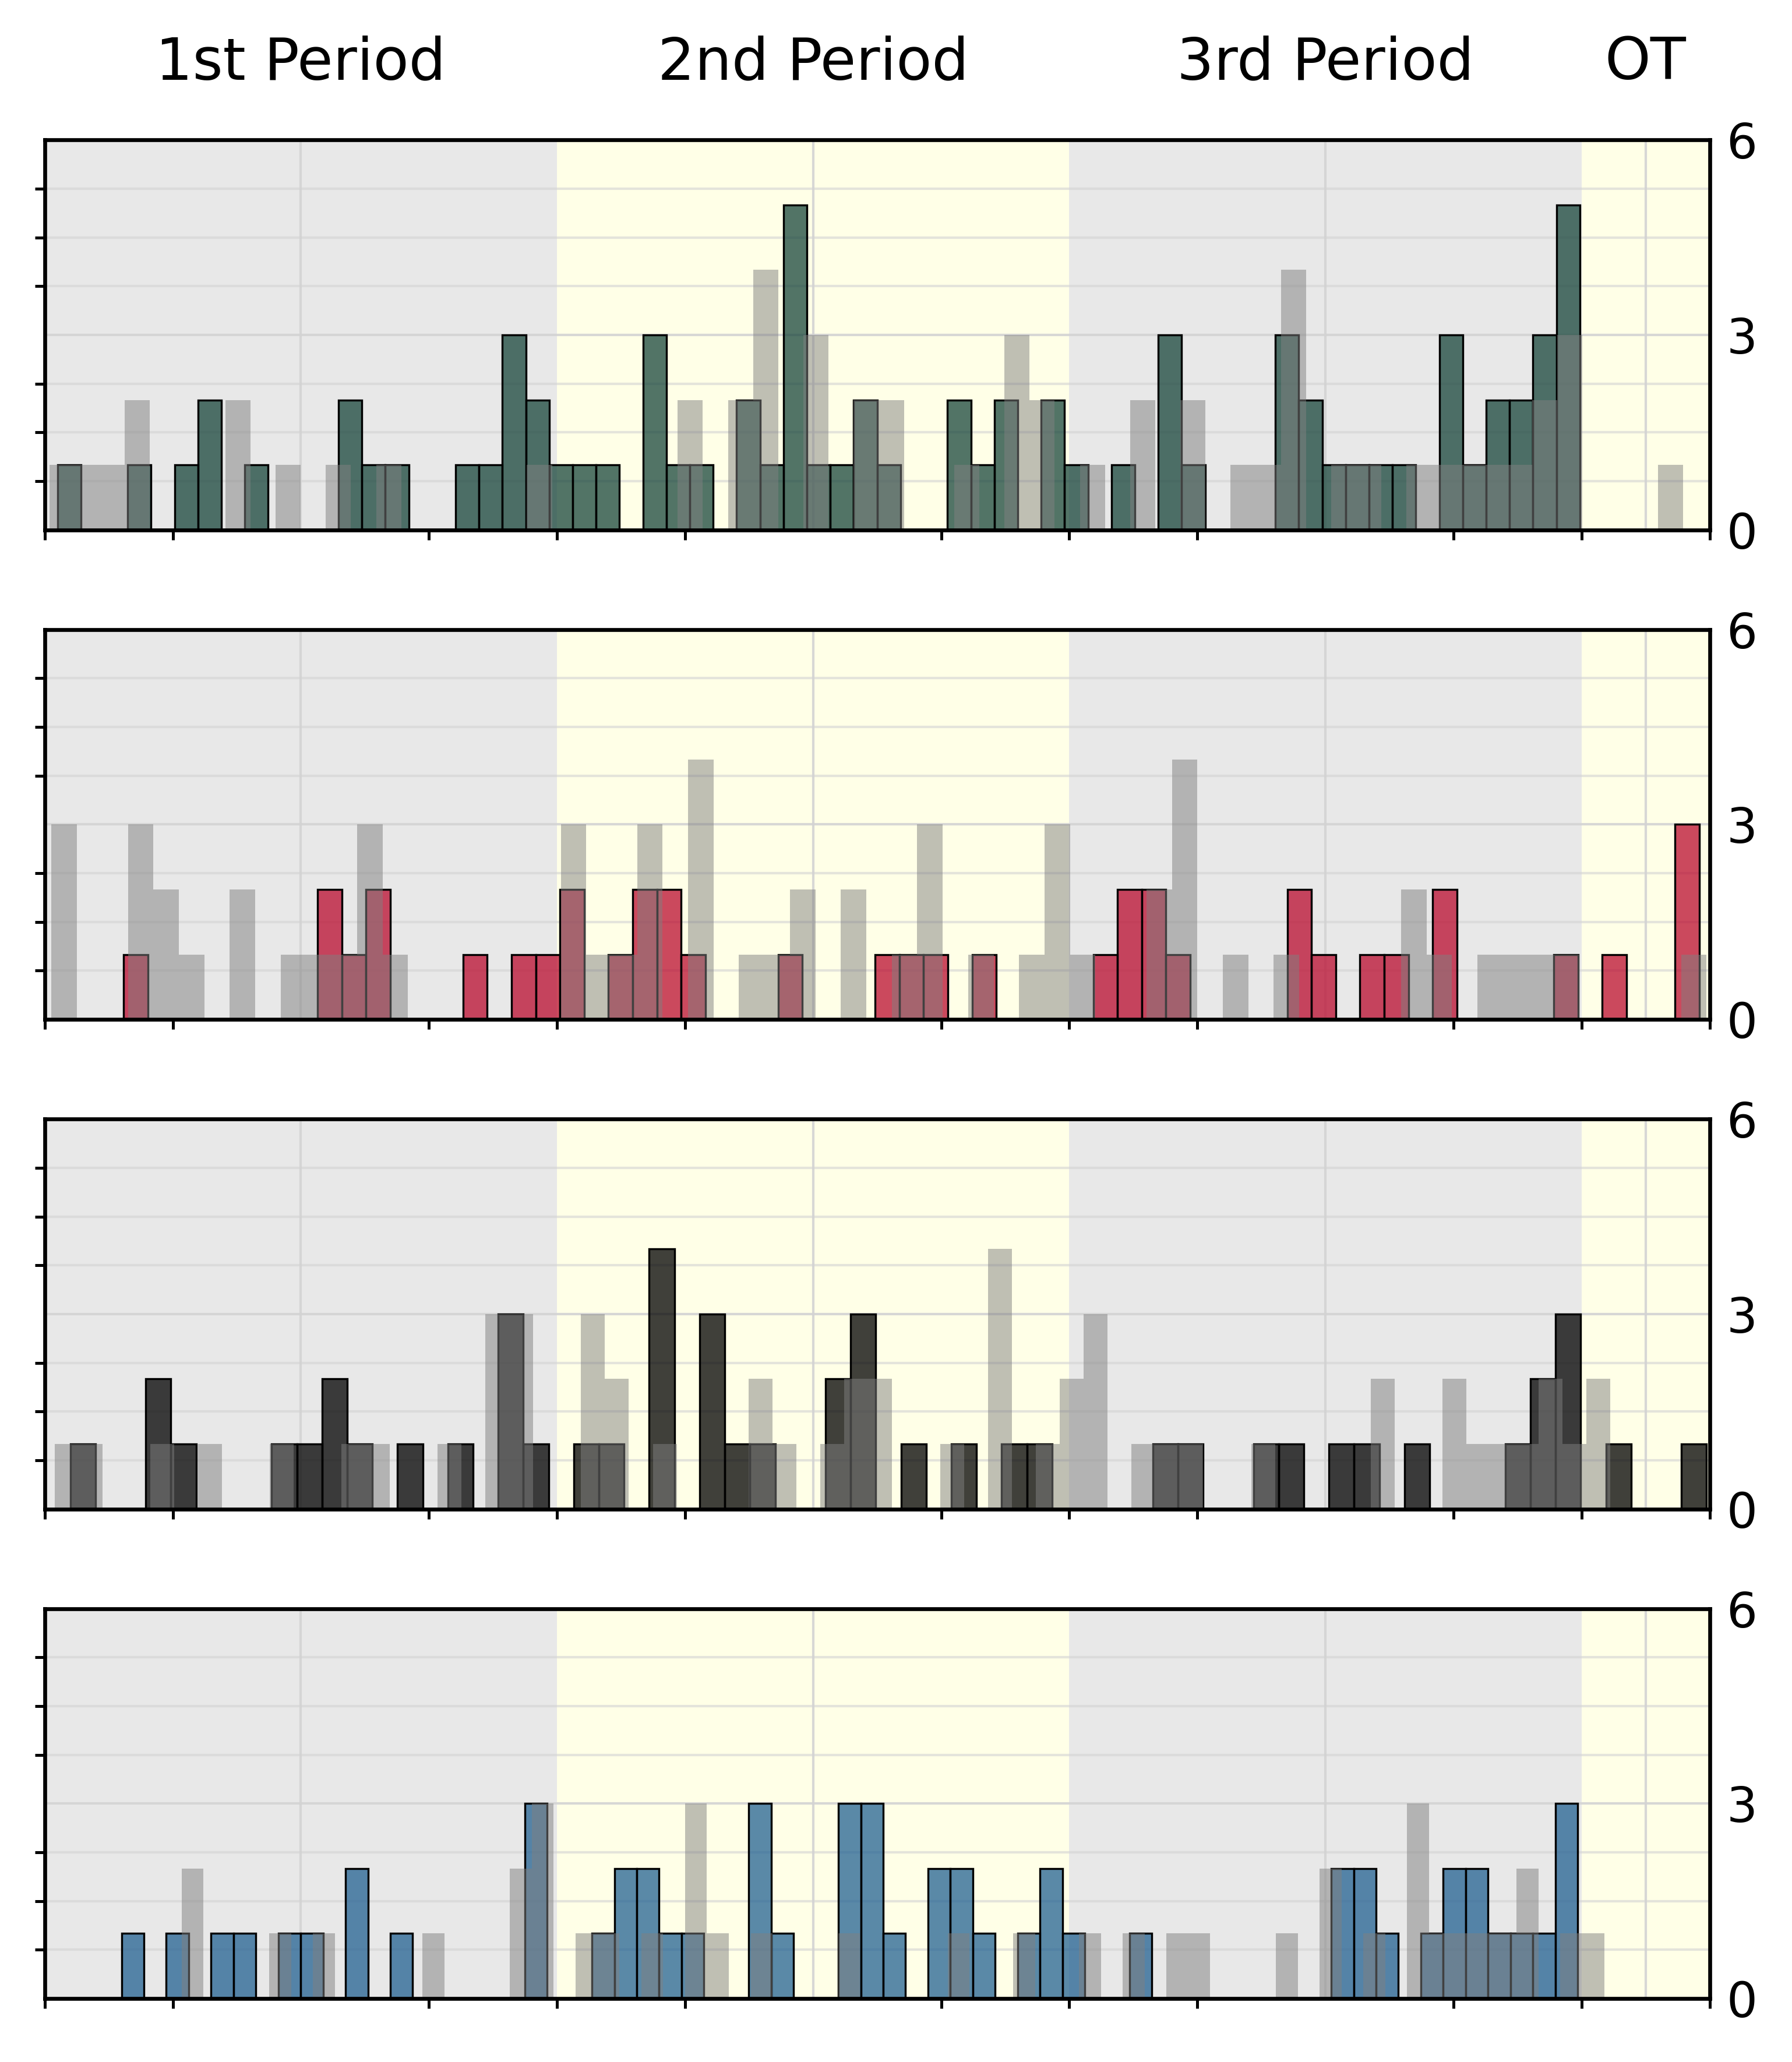

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Set the figure size
fig, ax = plt.subplots(4, 1, figsize=half_page, dpi=dpi)

teams_to_plot = [team_1, team_2, team_3, team_4]

# Determine the maximum y-value across all histograms
max_y_value = 0
for team in teams_to_plot:
    team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]
    bin_counts, _ = np.histogram(team_goals_time_df['Time'], bins=65, range=[0, 65])
    max_y_value = max(max_y_value, max(bin_counts))

## Loop through each team and plot the histogram of goals scored by time
for i, team in enumerate(teams_to_plot):
    team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]

    # Plot histogram
    sns.histplot(data=team_goals_time_df, x='Time', bins=65, ax=ax[i], color=team_colors[team], zorder=1)

    # # Plot KDE with adjusted bandwidth
    # sns.kdeplot(data=team_goals_time_df, x='Time', ax=ax[i], color="red", bw_adjust=0.5, zorder=2)

    # Plot the goals conceded by the team as a histogram in the background in grey
    team_conceded_goals_df = conceded_goals_df_corrected_v4[conceded_goals_df_corrected_v4['Team'] == team]
    sns.histplot(data=team_conceded_goals_df, x='Time', bins=65, ax=ax[i], color='grey', zorder=2, linewidth=0.0, alpha=0.5)


    
    # Set the x and y axis limits
    ax[i].set_xlim([0, 65])
    ax[i].set_ylim([0, max_y_value+1])

    # Custom x-axis ticks and labels for the periods
    period_ticks = [10, 30, 50, 62.5]  # Midpoints of 1st, 2nd, 3rd periods and OT
    period_labels = ['1st Period', '2nd Period', '3rd Period', 'OT']
    ax[i].set_xticks(period_ticks)
    ax[i].set_xticklabels(period_labels)

    # Add Major grid lines at 20, 40, 60 minute marks to deliniate periods
    
    

    
    # Set the x axis font properties
    ax[i].tick_params(axis='x', which='major', labelsize=12)

    # Remove x label
    ax[i].set_xlabel('')
    # remove tick marks from x axis
    ax[i].tick_params(axis='x', which='major', length=0)
    # Remove y label
    ax[i].set_ylabel('')
    # remove tick marks from y axis
    ax[i].tick_params(axis='y', which='major', length=0)
    # remove y tick labels
    # ax[i].set_yticklabels([])
    

    # Set the x and y axis labels and title
    # ax[i].set_xlabel('Game Time', font_label_param)
    # ax[i].set_ylabel(team, font_label_param)
    # ax[i].set_title(team, font_title_param)

    # Set grid, background color, and border properties
    ax[i].grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
    ax[i].grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
    # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
    ax[i].axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
    ax[i].axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
    # Shade 2nd period and OT in light yeallow
    ax[i].axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax[i].axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)

    # Remove The x labels from all but the last plot
    # if i != 3:
    #     ax[i].set_xlabel('')
    #     ax[i].set_xticklabels([])

    # Add the x ticks and labels but only to the fisrt plot and above the plot
    if i == 0:
        # ax[i].set_xticks(period_ticks)
        # ax[i].set_xticklabels(period_labels)
        # ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True, labelsize=12)
        # Set tick marks to go on top of the plot
        ax[i].tick_params(axis='x', which='major', pad=10, top=True, labeltop=True)
        # Remove tick marks from bottom of plot
        ax[i].tick_params(axis='x', which='major', bottom=False, labelbottom=False)
        # ax[i].set_xlabel('Game Time', font_label_param)

    else:        
        # Remove tick labels from all but plot 1
        ax[i].set_xticklabels([])



    # ax[i].set_facecolor('white')
    # for spine in ax[i].spines.values():
    #     spine.set_color('black')
    #     spine.set_linewidth(0.5)

# Adjust the spacing between plots
fig.tight_layout()
# Add a midpoint tick to the y axis
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[2].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[3].yaxis.set_major_locator(ticker.MultipleLocator(1))

# add the tick labels to the right side of the plot
ax[0].tick_params(axis='y', labelleft=False, labelright=True)
ax[1].tick_params(axis='y', labelleft=False, labelright=True)
ax[2].tick_params(axis='y', labelleft=False, labelright=True)
ax[3].tick_params(axis='y', labelleft=False, labelright=True)


# Label just 3 ticks on the y axis, the minium, the midpoint and the maximum
ax[0].set_yticks([0, 3, 6])
ax[1].set_yticks([0, 3, 6])
ax[2].set_yticks([0, 3, 6])
ax[3].set_yticks([0, 3, 6])

# Add Minor grid lines
ax[0].minorticks_on()  # Enable minor ticks
ax[0].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
ax[1].minorticks_on()  # Enable minor ticks
ax[1].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
ax[2].minorticks_on()  # Enable minor ticks
ax[2].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')
ax[3].minorticks_on()  # Enable minor ticks
ax[3].grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.6, which='minor', axis='y')

# Change all gird lines to underneath plot elements
for i in range(4):
    ax[i].set_axisbelow(True)



# Set title for entire figure
# fig.suptitle('Goals Scored by Time', **font_title_param)

# Save the plot
plt.savefig(f'{TEMP_FOLDER}goals_scored_by_time.png', bbox_inches='tight', dpi=dpi, transparent=True)

# Show the plot
plt.show()



## Physical comparison chart

C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{round(tick)} lb' for tick in ax.get_yticks()], fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

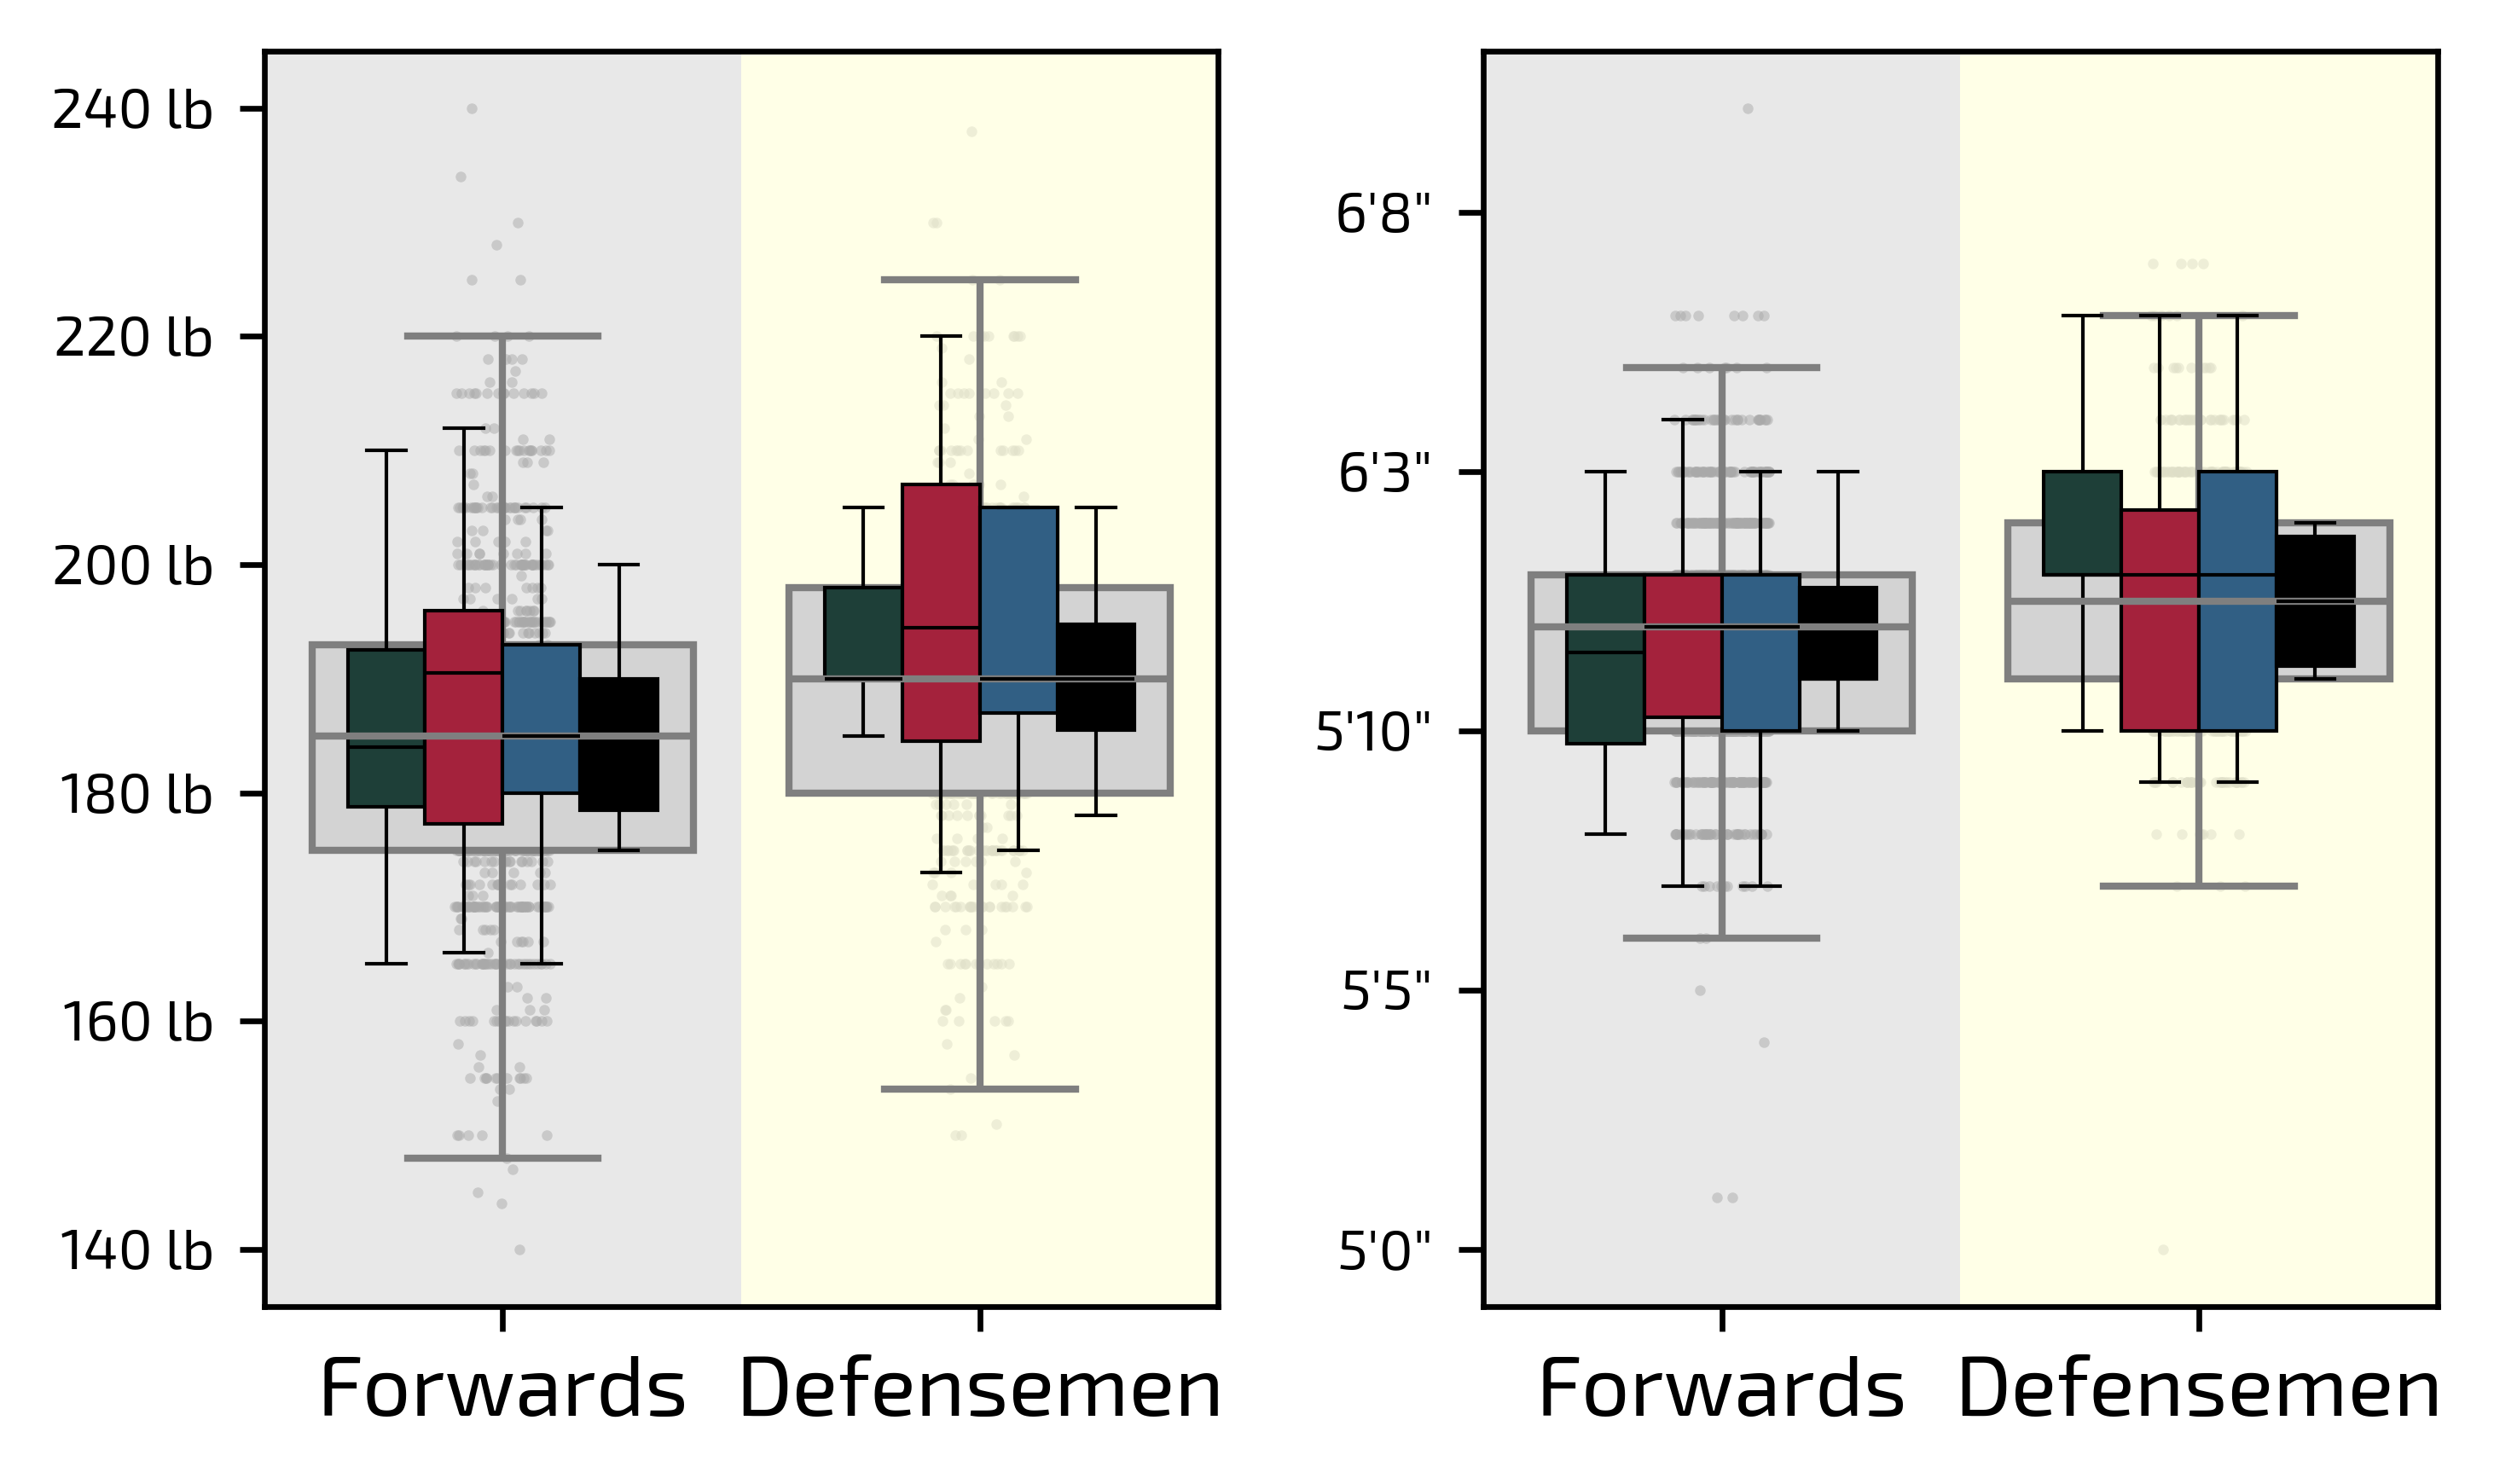

In [22]:
### Set the Output Folder for the images
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# Set the order of Class Rank
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # Create a filtered dataframe for Two Schools We want to highlight from the master roster in the database
roster_query_filtered = f"SELECT * FROM master_roster WHERE Team IN ('{team_1}', '{team_2}', '{team_3}', '{team_4}');"

# Get the entire roster from the master roster in the database
roster_query_full = f"SELECT * FROM master_roster;"

df_filtered = pd.read_sql(roster_query_filtered, conn)
df_full = pd.read_sql(roster_query_full, conn)

# Filter out any rows from df_full where Wt or Height is null or 0
df_full = df_full[(df_full['Wt'].notnull()) & (df_full['Height_Inches'].notnull())]
df_full = df_full[(df_full['Wt'] != 0) & (df_full['Height_Inches'] != 0)]



########### Create the Plots ###########
def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER, ax):
    
    # Set Axis ranges
    ax.set_xlim([0, len(x_order)])

    # Plots
    sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
    ## Original Swarm Plot
    # sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order, marker='.', size=1.5, zorder=1)

    ## NEW Swarmp Plot
    sns.stripplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order, marker='.', size=3, jitter=True, zorder=0)
    sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='Team', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=0.5)

    # Titles and Labels
    ax.set_title(title, fontdict=font_title_param)
    ax.set_ylabel(y_label, fontdict=font_label_param)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
    ax.set_xlabel('')

    # Height conversion for y-axis labels
    if y_col == 'Height_Inches':
        ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
    
    # # Add "LB" to weight labels
    if y_col == 'Wt':
        ax.set_yticklabels([f'{round(tick)} lb' for tick in ax.get_yticks()], fontdict=font_tick_param)

    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
        

    # Remove Legend if there is any
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
    # Remover plot titles
    ax.set_title('')
    ax.set_ylabel('')

    # Set Tick label sizes on both plots
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.tick_params(axis='y', which='major', labelsize=8)

    # Add striping to the background in light grey and light yellow to match other plots
    ax.axvspan(-0.5, .5, facecolor='lightgrey', alpha=0.5, zorder=0)
    ax.axvspan(.5, 1.5, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax.axvspan(1.5, 2.5, facecolor='lightgrey', alpha=0.5, zorder=0)
    ax.axvspan(2.5, 3.5, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax.axvspan(3.5, 4.5, facecolor='lightgrey', alpha=0.5, zorder=0)
    ax.axvspan(4.5, 5.5, facecolor='lightyellow', alpha=0.75, zorder=0)
    ax.axvspan(5.5, 6.5, facecolor='lightgrey', alpha=0.5, zorder=0)



    # Source and Signature Tags can be added here if needed
    # add_source_sig_text(ax)
    

### New Figsize for 1 x 2
quad_page = (5, 3)
# # Create a 2 x 1 figure of the physical comparison charts using the generate_plot function
fig, axs = plt.subplots(1, 2, figsize=quad_page, dpi=dpi)

generate_plot('Position', 'Wt', 'Weight (lbs)', ['Forwards', 'Defensemen'], 'Weight', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER, axs[0])
generate_plot('Position', 'Height_Inches', 'Height', ['Forwards', 'Defensemen'], 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER, axs[1])


fig.tight_layout()
plt.savefig(f'{TEMP_FOLDER}physical_comparison.png', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

In [23]:
# data

# df_filtered

C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{round(tick)} lb' for tick in ax.get_yticks()], fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4524\1973194476.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

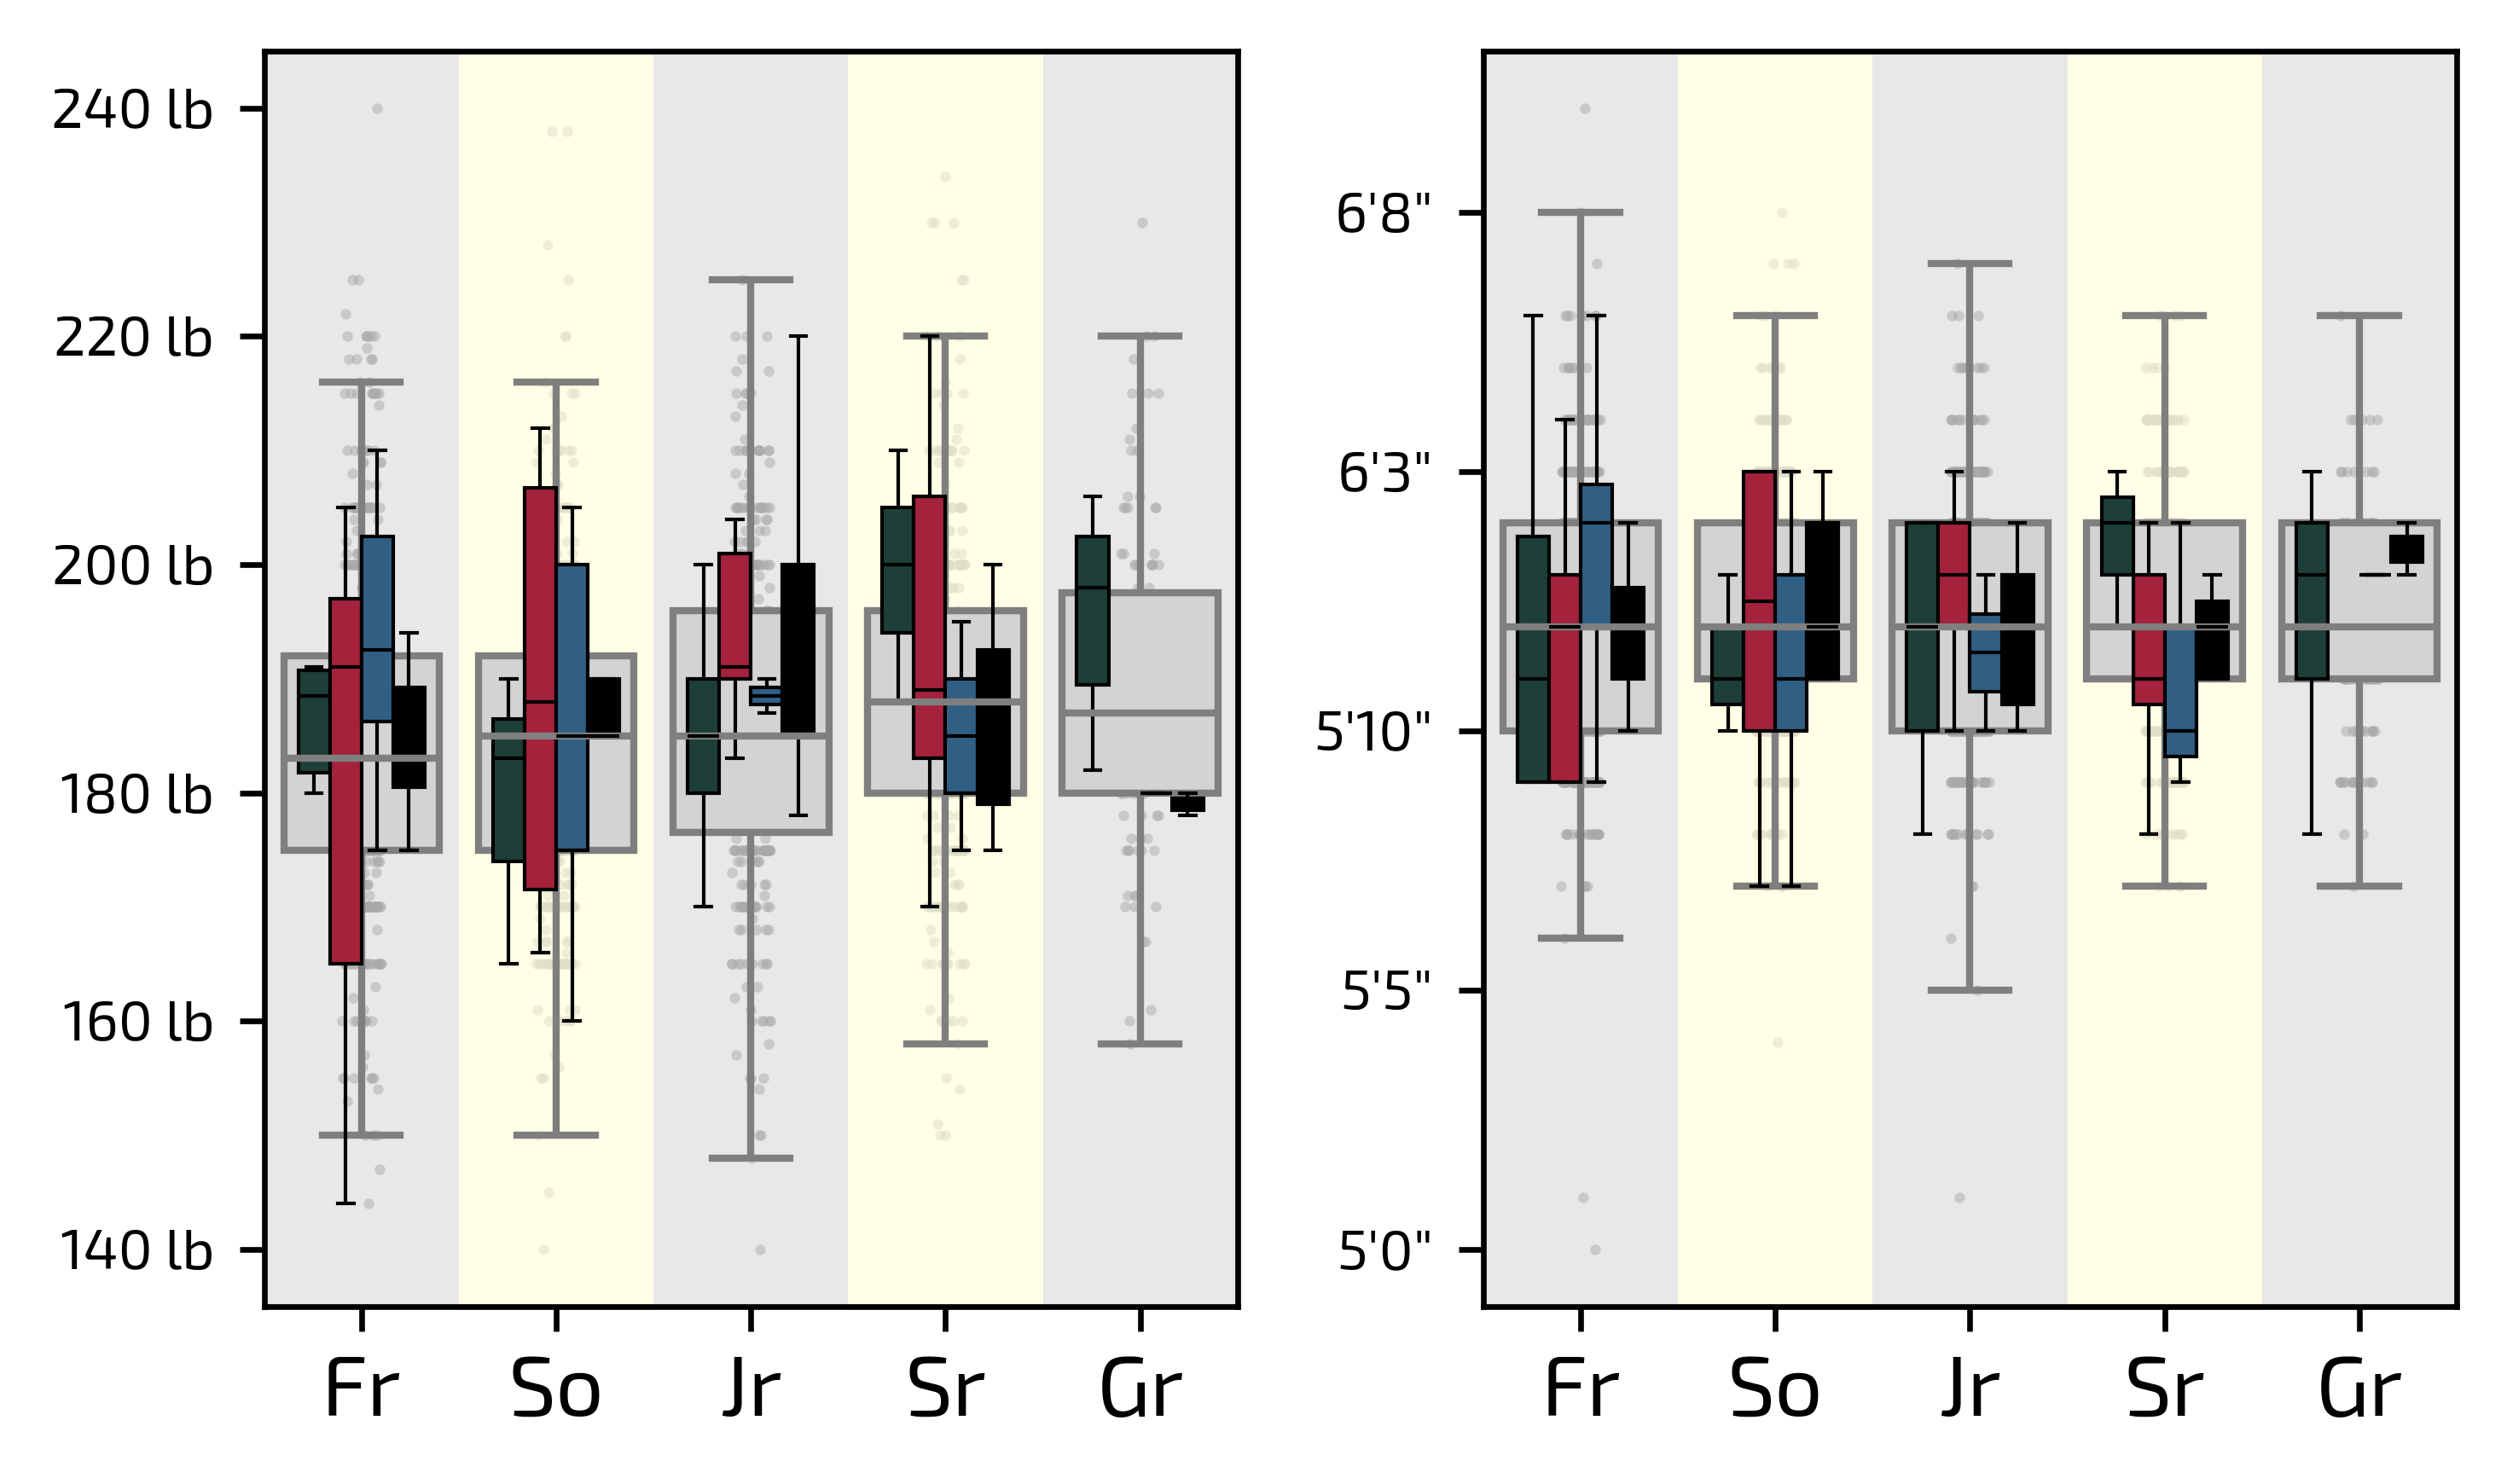

In [24]:
# Make the same physical comparison charts by Class Rank
fig, axs = plt.subplots(1, 2, figsize=quad_page, dpi=dpi)

generate_plot('Yr', 'Wt', '', class_order, 'Weight', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER, axs[0])
generate_plot('Yr', 'Height_Inches', '', class_order, 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER, axs[1])

# Apply Tight Layout
fig.tight_layout()


# Save the plot
plt.savefig(f'{TEMP_FOLDER}physical_comparison_class_rank.png', bbox_inches='tight', dpi=dpi, transparent=True)


## Make chart of penalties and when they occur during the game - similar to goal time chart
- might integrate into the goal time chart eventually

In [25]:
### Select and output the penalty summary table to a csv

# select the penalty summary table
penalty_summary_query = """
SELECT * FROM penalty_summary;
"""

# Read the penalty summary table into a dataframe
penalty_summary_df = pd.read_sql(penalty_summary_query, conn)

# output to csv in temp folder
penalty_summary_df.to_csv(f'{TEMP_FOLDER}penalty_summary.csv', index=False)

penalty_summary_df.head()

,Period,Team,Player,Pen_Length,Penalty_Type,Time,Game_ID
0,1st Period,Michigan State,Isaac Howard,2,High-sticking,4:00,2023-10-07-Lake Superior-Michigan State
1,2nd Period,Lake Superior,Bryan Huggins,2,Hitting From Behind,0:20,2023-10-07-Lake Superior-Michigan State
2,2nd Period,Lake Superior,Dawson Tritt,2,Holding,1:10,2023-10-07-Lake Superior-Michigan State
3,2nd Period,Michigan State,Artyom Levshunov,2,Slashing,15:50,2023-10-07-Lake Superior-Michigan State
4,2nd Period,Michigan State,Tiernan Shoudy,2,Kneeing,19:04,2023-10-07-Lake Superior-Michigan State


#### Testing

In [26]:
def plot_team_penalties(team, penalty_data):
    # Convert times to continuous format
    penalty_data['Start_Time'] = penalty_data.apply(convert_to_continuous_time, axis=1)
    penalty_data['End_Time'] = penalty_data['Start_Time'] + penalty_data['Pen_Length']

    # Filter out 10-minute penalties
    penalty_data = penalty_data[penalty_data['Pen_Length'].isin([2, 5])]

    # Identify Game IDs involving the specified team
    team_game_ids = penalty_data[penalty_data['Team'] == team]['Game_ID'].unique()

    # Filter penalties to those in the team's games
    team_games_penalty_data = penalty_data[penalty_data['Game_ID'].isin(team_game_ids)]

    # Initialize time series
    time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
    team_penalty_count = np.zeros_like(time_points)
    opponent_penalty_count = np.zeros_like(time_points)

    # Calculate penalty count for team and opponents
    for _, row in team_games_penalty_data.iterrows():
        start_idx = np.searchsorted(time_points, row['Start_Time'])
        end_idx = np.searchsorted(time_points, row['End_Time'])
        if row['Team'] == team:
            team_penalty_count[start_idx:end_idx] += 1
        else:
            opponent_penalty_count[start_idx:end_idx] += 1

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, team_penalty_count, label=f'{team} Penalties')
    plt.plot(time_points, opponent_penalty_count, label='Opponent Penalties')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Number of Players in Penalty Box')
    plt.title(f'Penalty Box Occupancy Over Time for {team}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_team_penalties('Michigan State', penalty_data)


KeyError: 'Period'

In [ ]:
# def plot_team_penalties(team, penalty_data, smoothing_window=5):
#     # Convert times to continuous format
#     penalty_data['Start_Time'] = penalty_data.apply(convert_to_continuous_time, axis=1)
#     penalty_data['End_Time'] = penalty_data['Start_Time'] + penalty_data['Pen_Length']

#     # Filter out 10-minute penalties
#     penalty_data = penalty_data[penalty_data['Pen_Length'].isin([2, 5])]

#     # Identify Game IDs involving the specified team
#     team_game_ids = penalty_data[penalty_data['Team'] == team]['Game_ID'].unique()

#     # Filter penalties to those in the team's games
#     team_games_penalty_data = penalty_data[penalty_data['Game_ID'].isin(team_game_ids)]

#     # Initialize time series
#     time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
#     team_penalty_count = np.zeros_like(time_points)
#     opponent_penalty_count = np.zeros_like(time_points)

    
#     # Calculate penalty count for team and opponents
#     for _, row in team_games_penalty_data.iterrows():
#         start_idx = np.searchsorted(time_points, row['Start_Time'])
#         end_idx = np.searchsorted(time_points, row['End_Time'])
#         if row['Team'] == team:
#             team_penalty_count[start_idx:end_idx] += 1
#         else:
#             opponent_penalty_count[start_idx:end_idx] += 1

#     # Apply smoothing using a rolling average
#     team_penalty_count_smoothed = pd.Series(team_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()
#     opponent_penalty_count_smoothed = pd.Series(opponent_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()

#     # Plot the smoothed data
#     plt.figure(figsize=(10, 6))
#     plt.plot(time_points, team_penalty_count_smoothed, label=f'{team} Penalties')
#     plt.plot(time_points, opponent_penalty_count_smoothed, label='Opponent Penalties')
#     plt.xlabel('Time (minutes)')
#     plt.ylabel('Number of Players in Penalty Box (Smoothed)')

#     # Invert the y-axis
#     plt.gca().invert_yaxis()

#     plt.title(f'Penalty Box Occupancy Over Time for {team} (Smoothed)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage with smoothing
# plot_team_penalties('Ferris State', penalty_data, smoothing_window=50)

In [ ]:
# def plot_team_penalties(team, penalty_data, color_mapping, smoothing_window=5):
#     # Convert times to continuous format
#     penalty_data['Start_Time'] = penalty_data.apply(convert_to_continuous_time, axis=1)
#     penalty_data['End_Time'] = penalty_data['Start_Time'] + penalty_data['Pen_Length']

#     # Filter out 10-minute penalties
#     penalty_data = penalty_data[penalty_data['Pen_Length'].isin([2, 5])]

#     # Identify Game IDs involving the specified team
#     team_game_ids = penalty_data[penalty_data['Team'] == team]['Game_ID'].unique()

#     # Filter penalties to those in the team's games
#     team_games_penalty_data = penalty_data[penalty_data['Game_ID'].isin(team_game_ids)]

#     # Initialize time series
#     time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
#     team_penalty_count = np.zeros_like(time_points)
#     opponent_penalty_count = np.zeros_like(time_points)

#     # Calculate penalty count for team and opponents
#     for _, row in team_games_penalty_data.iterrows():
#         start_idx = np.searchsorted(time_points, row['Start_Time'])
#         end_idx = np.searchsorted(time_points, row['End_Time'])
#         if row['Team'] == team:
#             team_penalty_count[start_idx:end_idx] += 1
#         else:
#             opponent_penalty_count[start_idx:end_idx] += 1

#     # Check the data
#     print("Team penalty count:", np.sum(team_penalty_count))
#     print("Opponent penalty count:", np.sum(opponent_penalty_count))

#     # Apply smoothing using a rolling average
#     team_penalty_count_smoothed = pd.Series(team_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()
#     opponent_penalty_count_smoothed = pd.Series(opponent_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()

#     # Plot the smoothed data
#     plt.figure(figsize=(10, 6))

#     # Plot and fill for the highlighted team
#     plt.fill_between(time_points, team_penalty_count_smoothed, color=color_mapping.get(team, 'blue'), alpha=0.3)
#     plt.plot(time_points, team_penalty_count_smoothed, label=f'{team} Penalties', color=color_mapping.get(team, 'blue'))

#     # Plot and fill for the opponent
#     plt.fill_between(time_points, opponent_penalty_count_smoothed, color='darkgrey', alpha=0.3)
#     plt.plot(time_points, opponent_penalty_count_smoothed, label='Opponent Penalties', color='darkgrey')

#     # Invert the y-axis
#     plt.gca().invert_yaxis()

#     plt.xlabel('Time (minutes)')
#     plt.ylabel('Number of Players in Penalty Box (Smoothed)')
#     plt.title(f'Penalty Box Occupancy Over Time for {team} (Inverted)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage with color mapping
# color_mapping = {'Michigan State': 'green', 'Another Team': 'red'}
# plot_team_penalties('Michigan State', penalty_data, color_mapping, smoothing_window=5)

# Test of New Game Temp plot including Goals and penalties

In [ ]:

# def plot_team_penalties(team, penalty_data, color_mapping, ax, smoothing_window=5):
#         # Convert times to continuous format
#     penalty_data['Start_Time'] = penalty_data.apply(convert_to_continuous_time, axis=1)
#     penalty_data['End_Time'] = penalty_data['Start_Time'] + penalty_data['Pen_Length']

#     # Filter out 10-minute penalties
#     penalty_data = penalty_data[penalty_data['Pen_Length'].isin([2, 5])]

#     # Identify Game IDs involving the specified team
#     team_game_ids = penalty_data[penalty_data['Team'] == team]['Game_ID'].unique()

#     # Filter penalties to those in the team's games
#     team_games_penalty_data = penalty_data[penalty_data['Game_ID'].isin(team_game_ids)]

#     # Initialize time series
#     time_points = np.linspace(0, 65, 65 * 60)  # 1-second intervals
#     team_penalty_count = np.zeros_like(time_points)
#     opponent_penalty_count = np.zeros_like(time_points)

#     # Calculate penalty count for team and opponents
#     for _, row in team_games_penalty_data.iterrows():
#         start_idx = np.searchsorted(time_points, row['Start_Time'])
#         end_idx = np.searchsorted(time_points, row['End_Time'])
#         if row['Team'] == team:
#             team_penalty_count[start_idx:end_idx] += 1
#         else:
#             opponent_penalty_count[start_idx:end_idx] += 1

#     # Apply smoothing using a rolling average
#     team_penalty_count_smoothed = pd.Series(team_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()
#     opponent_penalty_count_smoothed = pd.Series(opponent_penalty_count).rolling(window=smoothing_window, min_periods=1).mean()

#     # Plot the smoothed data on the given ax
#     ax.fill_between(time_points, team_penalty_count_smoothed, color=color_mapping.get(team, 'blue'), alpha=0.3)
#     ax.plot(time_points, team_penalty_count_smoothed, label=f'{team} Penalties', color=color_mapping.get(team, 'blue'), linewidth=set_linewidth)  # Changed line style
#     ax.fill_between(time_points, opponent_penalty_count_smoothed, color='darkgrey', alpha=0.3)
#     ax.plot(time_points, opponent_penalty_count_smoothed, label='Opponent Penalties', color='darkgrey', linestyle='-', linewidth=set_linewidth)  # Changed line style

#     # Invert the y-axis of the subplot
#     ax.invert_yaxis()

# # Set the figure size
# fig, ax = plt.subplots(4, 1, figsize=half_page, dpi=dpi)

# teams_to_plot = [team_1, team_2, team_3, team_4]

# # Determine the maximum y-value across all histograms
# max_y_value = 0
# for team in teams_to_plot:
#     team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]
#     bin_counts, _ = np.histogram(team_goals_time_df['Time'], bins=65, range=[0, 65])
#     max_y_value = max(max_y_value, max(bin_counts))

# ## Loop through each team and plot the histogram of goals scored by time
# for i, team in enumerate(teams_to_plot):
#     team_goals_time_df = goals_time_df[goals_time_df['Team'] == team]

#     # Plot histogram
#     sns.histplot(data=team_goals_time_df, x='Time', bins=65, ax=ax[i], color=team_colors[team], zorder=1)
#     team_conceded_goals_df = conceded_goals_df_corrected_v4[conceded_goals_df_corrected_v4['Team'] == team]
#     sns.histplot(data=team_conceded_goals_df, x='Time', bins=65, ax=ax[i], color='grey', zorder=2, linewidth=1.0, alpha=0.75)

#     # Add penalty plot
#     # plot_team_penalties(team, penalty_data, team_colors, ax[i], smoothing_window=5) # ORIG
#     # Add penalty plot with inverted y-axis and custom line styles
#     plot_team_penalties(team, penalty_data, team_colors, ax[i], smoothing_window=5)


    
#     # Set the x and y axis limits
#     ax[i].set_xlim([0, 65])
#     ax[i].set_ylim([0, max_y_value+1])

#     # Custom x-axis ticks and labels for the periods
#     period_ticks = [10, 30, 50, 62.5]  # Midpoints of 1st, 2nd, 3rd periods and OT
#     period_labels = ['1st Period', '2nd Period', '3rd Period', 'OT']
#     ax[i].set_xticks(period_ticks)
#     ax[i].set_xticklabels(period_labels)

#     # Add Major grid lines at 20, 40, 60 minute marks to deliniate periods
    
    

    
#     # Set the x axis font properties
#     ax[i].tick_params(axis='x', which='major', labelsize=12)

#     # Remove x label
#     ax[i].set_xlabel('')
#     # remove tick marks from x axis
#     ax[i].tick_params(axis='x', which='major', length=0)
#     # Remove y label
#     ax[i].set_ylabel('')
#     # remove tick marks from y axis
#     ax[i].tick_params(axis='y', which='major', length=0)
#     # remove y tick labels
#     ax[i].set_yticklabels([])
    

#     # Set the x and y axis labels and title
#     # ax[i].set_xlabel('Game Time', font_label_param)
#     # ax[i].set_ylabel(team, font_label_param)
#     # ax[i].set_title(team, font_title_param)

#     # Set grid, background color, and border properties
#     ax[i].grid(True, axis='y', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
#     ax[i].grid(True, axis='x', color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.9, zorder=0)
#     # shade the periods - first and third periods (0 to 20 and 40 to 60) in light grey
#     ax[i].axvspan(0, 20, facecolor='lightgrey', alpha=0.5, zorder=0)
#     ax[i].axvspan(40, 60, facecolor='lightgrey', alpha=0.5, zorder=0)
#     # Shade 2nd period and OT in light yeallow
#     ax[i].axvspan(20, 40, facecolor='lightyellow', alpha=0.75, zorder=0)
#     ax[i].axvspan(60, 65, facecolor='lightyellow', alpha=0.75, zorder=0)



#     # ax[i].set_facecolor('white')
#     # for spine in ax[i].spines.values():
#     #     spine.set_color('black')
#     #     spine.set_linewidth(0.5)

# # Adjust the spacing between plots
# fig.tight_layout()
# # Add a midpoint tick to the y axis
# ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax[2].yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax[3].yaxis.set_major_locator(ticker.MultipleLocator(1))
# # add the tick labels to the right side of the plot
# ax[0].tick_params(axis='y', labelleft=False, labelright=True)
# ax[1].tick_params(axis='y', labelleft=False, labelright=True)
# ax[2].tick_params(axis='y', labelleft=False, labelright=True)
# ax[3].tick_params(axis='y', labelleft=False, labelright=True)

# # Set title for entire figure
# # fig.suptitle('Goals Scored by Time', **font_title_param)

# # Save the plot
# plt.savefig(f'{TEMP_FOLDER}goals_scored_by_time.png', bbox_inches='tight', dpi=dpi, transparent=True)

# # Show the plot
# plt.show()
